## I. Introduction to the Problem and Dataset

The garment industry is a labor-intensive sector heavily dependent on manual processes. This reliance presents several challenges, including maintaining high levels of productivity, ensuring consistent quality, and managing the workforce efficiently. With increasing competition and the need for rapid turnaround times, optimizing these processes becomes crucial for industry stakeholders. As such, tracking, analyzing, and predicting productivity and performance of factory teams is highly desirable. With that in mind, the problem/task that will be targeted in this notebook is a regression problem focusing on predicting productivity.

## II. Description of the dataset

The Garments dataset is a dataset that contains important attributes of the garment manufacturing process and employee productivity. This dataset was manually collected by Abdulla Al Imran and then validated by industry experts. As the data was manually collected, there is a possibility that the accuracy and reliability of the data is affected. However, as the data was validated by industry experts, the impact on accuracy and reliability of the data may be lessened. 

In the dataset, each row represents an instance identified by a combination of three features: date, team, and department. Meanwhile, each column represents a feature. There are a total of 1197 instances in this dataset and 15 features. The features are as follows:

- date: the working day from when the data is from
- quarter: the portion of the month. In the context of this dataset, it serves as 7 day intervals of a month meaning months reaching over 28 days may have a 5th quarter.
- department: the department associated with the rest of the data of the instance
- day: the day of the week
- team: the team number ass
- targeted_productivity: the targeted productivity set by those in charge of each team for the day.
- smv: standard minute value, the amount of time required to complete a task under standard working conditions
- wip: work in progress, the amount of items that are still being worked on as well as unfinished items
- over_time: the amount of overtime spent by each team in total in minutes
- incentive: the amount of financial incentive (specifically BDT) used to motivate workers
- idle_time: the amount of times when production was interrupted during the day
- idle_men: the number of workers who were idle because of production interruption
- actual_productivity: the % of productivity delivered by the workers (0-1 scale)


## III. List of requirements

Set the path for the dataset as well as the random_seed to be used

In [29]:
# Constants
dataset_path = 'Dataset 2 - Garments Dataset/garments.csv'
random_seed = 69

Libraries used include:

- pandas
- numpy
- matplotlib
- itertools
- seaborn
- sklearn
- joblib

In [3]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

# Training and Testing the model
from sklearn.model_selection import train_test_split # For splitting the dataset into training and testing
from sklearn.pipeline import Pipeline # For creating a pipeline
from sklearn.compose import ColumnTransformer # For transforming the columns
from sklearn.preprocessing import StandardScaler # For Standardization
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV # For Hyperparameter Tuning
from sklearn.preprocessing import PolynomialFeatures  # For Polynomial Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score   # For evaluation
import joblib   # For saving the model
from sklearn.base import BaseEstimator, RegressorMixin # For creating a custom regressor

# Models
from sklearn.linear_model import LinearRegression # For Linear Regression
from sklearn.linear_model import SGDRegressor # For Stochastic Gradient Descent
from sklearn.neural_network import MLPRegressor # For Neural Network
from sklearn.ensemble import RandomForestRegressor

# Load the dataset from Dataset folder
og_df = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)

pd.set_option('display.max_columns', None) # Display all columns

C:\Users\Rapha\AppData\Local\Temp\ipykernel_20388\176896574.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## IV. Data Preprocessing and Cleaning


Check for null values

In [4]:
# check for NaN values
print(df.isnull().sum())

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


In [5]:
# check values in wip
df['wip'].value_counts()

wip
1039.0    5
1282.0    4
1263.0    3
1216.0    3
1069.0    3
         ..
1635.0    1
1519.0    1
1337.0    1
1118.0    1
914.0     1
Name: count, Length: 548, dtype: int64

Fill in the null values with the mean of the column. Setting the mean as the fill value instead of 0 is done as the feature is 'WIP', a feature representing the unfinished items at some stage of production in the garment factory. Since it's improbable that the WIP value is zero (as long as production is ongoing), filling null values with the column's mean is a reasonable approach

In [6]:
# fill in the missing values with the mean of the column
df['wip'].fillna(df['wip'].mean(), inplace=True)
df['wip'].value_counts()

C:\Users\Rapha\AppData\Local\Temp\ipykernel_20388\4227023706.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wip'].fillna(df['wip'].mean(), inplace=True)


wip
1190.465991    506
1039.000000      5
1282.000000      4
1422.000000      3
1216.000000      3
              ... 
1635.000000      1
1519.000000      1
1337.000000      1
1118.000000      1
914.000000       1
Name: count, Length: 549, dtype: int64

The department column has typos and inconsistencies so it will be cleaned.

In [7]:
# check department column
print(df['department'].unique())

# change all 'finishing ' to 'finishing'
df['department'] = df['department'].replace('finishing ', 'finishing')
df['department'] = df['department'].replace('sweing', 'sewing')
print(df['department'].unique())

['sweing' 'finishing ' 'finishing']
['sewing' 'finishing']


Checking the data type of all the columns to ensure that they are in the correct format.

In [8]:
#check datatypes for all columns
print(df.dtypes)

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object


We check the values of the features to ensure that there are no anomalies in the data.

In [9]:
print(df['department'].value_counts())

department
sewing       691
finishing    506
Name: count, dtype: int64


In [10]:
print(df['quarter'].value_counts())

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64


In [11]:
print(df['day'].value_counts())

day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64


In [12]:
print(df['team'].value_counts())

team
8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: count, dtype: int64


In [13]:
print(df['targeted_productivity'].value_counts())

targeted_productivity
0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: count, dtype: int64


In [14]:
print(df['smv'].value_counts())

smv
3.94     192
2.90     108
22.52    103
30.10     79
4.15      76
        ... 
48.68      1
54.56      1
41.19      1
49.10      1
40.99      1
Name: count, Length: 70, dtype: int64


In [15]:
print(df['over_time'].value_counts())

over_time
960      129
1440     111
6960      61
6840      48
1200      39
        ... 
4140       1
12180      1
10770      1
12000      1
3120       1
Name: count, Length: 143, dtype: int64


There are instances of no_of_workers having half values. This is not possible in a real-world scenario so the values will be rounded down to the nearest whole number. We round down as a conservative estimation to avoid overestimating the number of workers.

In [16]:
print(df['no_of_workers'].head())
# round down the no_of_workers
df['no_of_workers'] = np.floor(df['no_of_workers'])
print(df['no_of_workers'].head())

0    59.0
1     8.0
2    30.5
3    30.5
4    56.0
Name: no_of_workers, dtype: float64
0    59.0
1     8.0
2    30.0
3    30.0
4    56.0
Name: no_of_workers, dtype: float64


Check if there are any instances where actual productivity exceeds the 0-1 range

In [17]:
print(df['actual_productivity'].value_counts())
# print actual_productivity where it is < 0 or > 1
print(df[(df['actual_productivity'] < 0) | (df['actual_productivity'] > 1)])

actual_productivity
0.800402    24
0.971867    12
0.850137    12
0.750651    11
0.850502    11
            ..
0.800034     1
0.800024     1
0.769293     1
0.750031     1
0.394722     1
Name: count, Length: 879, dtype: int64
          date   quarter department        day  team  targeted_productivity  \
337  1/20/2015  Quarter3  finishing    Tuesday     5                   0.70   
437  1/26/2015  Quarter4  finishing     Monday     3                   0.75   
456  1/27/2015  Quarter4     sewing    Tuesday     2                   0.75   
457  1/27/2015  Quarter4     sewing    Tuesday     3                   0.75   
477  1/28/2015  Quarter4     sewing  Wednesday     2                   0.80   
478  1/28/2015  Quarter4     sewing  Wednesday     3                   0.80   
498  1/29/2015  Quarter5     sewing   Thursday     2                   0.80   
518  1/31/2015  Quarter5     sewing   Saturday     3                   0.80   
519  1/31/2015  Quarter5     sewing   Saturday     2             

Since actual productivity has values exceeding 1, we round them to 1. We do this since the dataset description states that the range of actual productivity is 0-1. This is done to ensure that the model is trained on the correct range of values.

In [18]:
# round down the actual_productivity if it is > 1
df['actual_productivity'] = np.where(df['actual_productivity'] > 1, 1, df['actual_productivity'])
print(df[(df['actual_productivity'] < 0) | (df['actual_productivity'] > 1)])

Empty DataFrame
Columns: [date, quarter, department, day, team, targeted_productivity, smv, wip, over_time, incentive, idle_time, idle_men, no_of_style_change, no_of_workers, actual_productivity]
Index: []


We drop the date column as the data only spans a single season, making it unlikely to provide meaningful variability or insights for analysis.

In [19]:
#drop date
df = df.drop('date', axis=1)

In [20]:
# check for duplicates
print(df.duplicated().sum())

0


In [21]:
#check if any numerical value is less than 0
print(df[(df.select_dtypes(include=[np.number]) < 0).any(axis=1)])

Empty DataFrame
Columns: [quarter, department, day, team, targeted_productivity, smv, wip, over_time, incentive, idle_time, idle_men, no_of_style_change, no_of_workers, actual_productivity]
Index: []


In [22]:
# print all datatypes
print(df.dtypes)

quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object


We check for large over_time values but do not remove them yet as the data may be valid and the numbers are believable.

In [23]:
# calculate overtime per worker
df['overtime_per_worker'] = df['over_time'] / df['no_of_workers']
print(df[df['overtime_per_worker'] > 120].shape)
print(df[df['overtime_per_worker'] > 240].shape)
print(df[df['overtime_per_worker'] > 420].shape)
print(df[df['overtime_per_worker'] > 600].shape)

(490, 15)
(70, 15)
(16, 15)
(2, 15)


In [24]:
# print all idle_men with decimal values
print(df[df['idle_men'] % 1 != 0])

Empty DataFrame
Columns: [quarter, department, day, team, targeted_productivity, smv, wip, over_time, incentive, idle_time, idle_men, no_of_style_change, no_of_workers, actual_productivity, overtime_per_worker]
Index: []


In [25]:
#print all rows with idle time = 0 and idle_men > 0
print(df[(df['idle_time'] == 0) & (df['idle_men'] > 0)])

Empty DataFrame
Columns: [quarter, department, day, team, targeted_productivity, smv, wip, over_time, incentive, idle_time, idle_men, no_of_style_change, no_of_workers, actual_productivity, overtime_per_worker]
Index: []


Since department, day, and quarter are categorical variables, we one-hot encode them. 

In [26]:
# turn department, day, and quarter into one-hot encoding
df_cleaned = df.copy()
df = pd.get_dummies(df, columns=['department', 'day', 'quarter'])
# print all datatypes
print(df.dtypes)

team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
overtime_per_worker      float64
department_finishing        bool
department_sewing           bool
day_Monday                  bool
day_Saturday                bool
day_Sunday                  bool
day_Thursday                bool
day_Tuesday                 bool
day_Wednesday               bool
quarter_Quarter1            bool
quarter_Quarter2            bool
quarter_Quarter3            bool
quarter_Quarter4            bool
quarter_Quarter5            bool
dtype: object


We check for days where there are no incentives but there is overtime. However, we do not remove these instances as incentives may not be the only reason for overtime.

In [27]:
#check for days where there are no incentives but have overtime
df[(df['incentive'] == 0) & (df['over_time'] > 0)][['targeted_productivity', 'idle_men', 'idle_time', 'actual_productivity', 'incentive', 'over_time', 'wip', 'smv']]

targeted_productivity  idle_men  idle_time  actual_productivity  \
1                      0.75         0        0.0             0.886500   
6                      0.75         0        0.0             0.755167   
13                     0.65         0        0.0             0.705917   
14                     0.75         0        0.0             0.676667   
15                     0.75         0        0.0             0.593056   
...                     ...       ...        ...                  ...   
1192                   0.75         0        0.0             0.628333   
1193                   0.70         0        0.0             0.625625   
1194                   0.65         0        0.0             0.625625   
1195                   0.75         0        0.0             0.505889   
1196                   0.70         0        0.0             0.394722   

      incentive  over_time          wip   smv  
1             0        960  1190.465991  3.94  
6             0        960  1190.465991  3.94  
13            0        960  1190.465991  3.94  
14            0        960  1190.465991  2.90  
15            0       2160  1190.465991  3.94  
...         ...        ...          ...   ...  
1192          0        960  1190.465991  2.90  
1193          0        960  1190.465991  3.90  
1194          0        960  1190.465991  3.90  
1195          0       1800  1190.465991  2.90  
1196          0        720  1190.465991  2.90  

[600 rows x 8 columns]

In [28]:
#check cleaned dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   1197 non-null   int64  
 1   targeted_productivity  1197 non-null   float64
 2   smv                    1197 non-null   float64
 3   wip                    1197 non-null   float64
 4   over_time              1197 non-null   int64  
 5   incentive              1197 non-null   int64  
 6   idle_time              1197 non-null   float64
 7   idle_men               1197 non-null   int64  
 8   no_of_style_change     1197 non-null   int64  
 9   no_of_workers          1197 non-null   float64
 10  actual_productivity    1197 non-null   float64
 11  overtime_per_worker    1197 non-null   float64
 12  department_finishing   1197 non-null   bool   
 13  department_sewing      1197 non-null   bool   
 14  day_Monday             1197 non-null   bool   
 15  day_

# V. Exploratory Data Analysis

## V-A. Correlation and Distribution of Numerical Features (Seal)

A histogram and boxplot is used to determine the distribution of the data and outlier detection for all numerical features in the data. As observed below, numerical features in the dataset have significantly different ranges.  Large-scale differences can bias these algorithms toward features with larger magnitudes.

Hence, there is a major Consideration to use Standard Scaler as it centers the data at 0 and scales all features to a standard deviation of 1, ensuring all features contribute equally to the model.


In [257]:
df.head()

team  targeted_productivity    smv          wip  over_time  incentive  \
0     8                   0.80  26.16  1108.000000       7080         98   
1     1                   0.75   3.94  1190.465991        960          0   
2    11                   0.80  11.41   968.000000       3660         50   
3    12                   0.80  11.41   968.000000       3660         50   
4     6                   0.80  25.90  1170.000000       1920         50   

   idle_time  idle_men  no_of_style_change  no_of_workers  \
0        0.0         0                   0           59.0   
1        0.0         0                   0            8.0   
2        0.0         0                   0           30.0   
3        0.0         0                   0           30.0   
4        0.0         0                   0           56.0   

   actual_productivity  overtime_per_worker  department_finishing  \
0             0.940725           120.000000                 False   
1             0.886500           120.000000                  True   
2             0.800570           122.000000                 False   
3             0.800570           122.000000                 False   
4             0.800382            34.285714                 False   

   department_sewing  day_Monday  day_Saturday  day_Sunday  day_Thursday  \
0               True       False         False       False          True   
1              False       False         False       False          True   
2               True       False         False       False          True   
3               True       False         False       False          True   
4               True       False         False       False          True   

   day_Tuesday  day_Wednesday  quarter_Quarter1  quarter_Quarter2  \
0        False          False              True             False   
1        False          False              True             False   
2        False          False              True             False   
3        False          False              True             False   
4        False          False              True             False   

   quarter_Quarter3  quarter_Quarter4  quarter_Quarter5  
0             False             False             False  
1             False             False             False  
2             False             False             False  
3             False             False             False  
4             False             False             False

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   1197 non-null   int64  
 1   targeted_productivity  1197 non-null   float64
 2   smv                    1197 non-null   float64
 3   wip                    1197 non-null   float64
 4   over_time              1197 non-null   int64  
 5   incentive              1197 non-null   int64  
 6   idle_time              1197 non-null   float64
 7   idle_men               1197 non-null   int64  
 8   no_of_style_change     1197 non-null   int64  
 9   no_of_workers          1197 non-null   float64
 10  actual_productivity    1197 non-null   float64
 11  overtime_per_worker    1197 non-null   float64
 12  department_finishing   1197 non-null   bool   
 13  department_sewing      1197 non-null   bool   
 14  day_Monday             1197 non-null   bool   
 15  day_

In [259]:
df.describe()

team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000   1197.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1395.647261   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    970.000000   
50%       6.000000               0.750000    15.260000   1190.465991   
75%       9.000000               0.800000    24.260000   1190.465991   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.000000     0.000000   
50%     3960.000000     0.000000     0.000000     0.000000   
75%     6960.000000    50.000000     0.000000     0.000000   
max    25920.000000  3600.000000   300.000000    45.000000   

       no_of_style_change  no_of_workers  actual_productivity  \
count         1197.000000    1197.000000          1197.000000   
mean             0.150376      34.551378             0.734461   
std              0.427848      22.152559             0.173380   
min              0.000000       2.000000             0.233705   
25%              0.000000       9.000000             0.650307   
50%              0.000000      34.000000             0.773333   
75%              0.000000      57.000000             0.850253   
max              2.000000      89.000000             1.000000   

       overtime_per_worker  
count          1197.000000  
mean            148.533406  
std              86.042508  
min               0.000000  
25%             120.000000  
50%             120.000000  
75%             180.000000  
max             720.000000

In [260]:
def plot_numerics(data):
    numeric_columns = data.columns
    # Plotting histograms and box plots for each numeric column
    for column in numeric_columns:
        _, ax = plt.subplots(1,2, figsize=(16, 5))
        ax=ax.flatten()
        # Histogram
        sns.histplot(data[column], bins=50, kde=True, color='skyblue', ax=ax[0])
        ax[0].set_title(f'Histogram of {column}', fontsize=15,fontweight='bold')
        ax[0].set_xlabel(column, fontsize=12)
        ax[0].set_ylabel('Frequency', fontsize=12)
        # Box plot
        sns.boxplot(x=data[column], color='#FFEE8C', ax=ax[1])
        ax[1].set_title(f'Box plot of {column}', fontsize=15,fontweight='bold')
        ax[1].set_xlabel(column, fontsize=12)
        plt.tight_layout()
        plt.show()

In [261]:
df.describe()

team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000   1197.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1395.647261   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    970.000000   
50%       6.000000               0.750000    15.260000   1190.465991   
75%       9.000000               0.800000    24.260000   1190.465991   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.000000     0.000000   
50%     3960.000000     0.000000     0.000000     0.000000   
75%     6960.000000    50.000000     0.000000     0.000000   
max    25920.000000  3600.000000   300.000000    45.000000   

       no_of_style_change  no_of_workers  actual_productivity  \
count         1197.000000    1197.000000          1197.000000   
mean             0.150376      34.551378             0.734461   
std              0.427848      22.152559             0.173380   
min              0.000000       2.000000             0.233705   
25%              0.000000       9.000000             0.650307   
50%              0.000000      34.000000             0.773333   
75%              0.000000      57.000000             0.850253   
max              2.000000      89.000000             1.000000   

       overtime_per_worker  
count          1197.000000  
mean            148.533406  
std              86.042508  
min               0.000000  
25%             120.000000  
50%             120.000000  
75%             180.000000  
max             720.000000

Here, we will plot the numerical features to see the distribution of the data and to check for outliers.

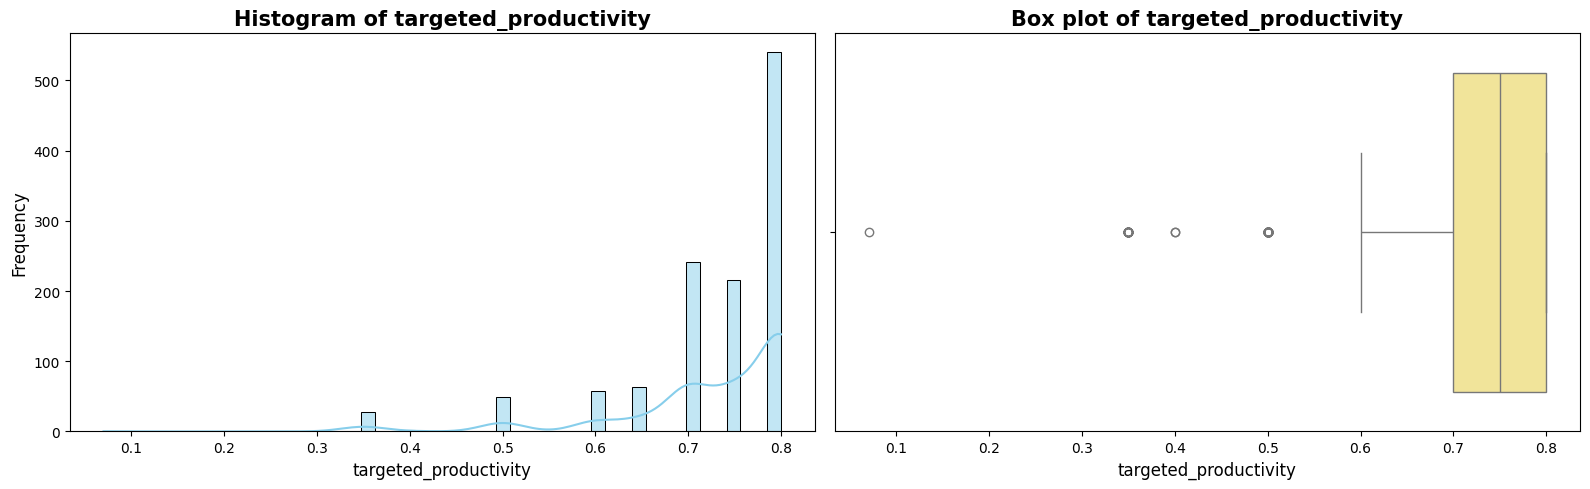

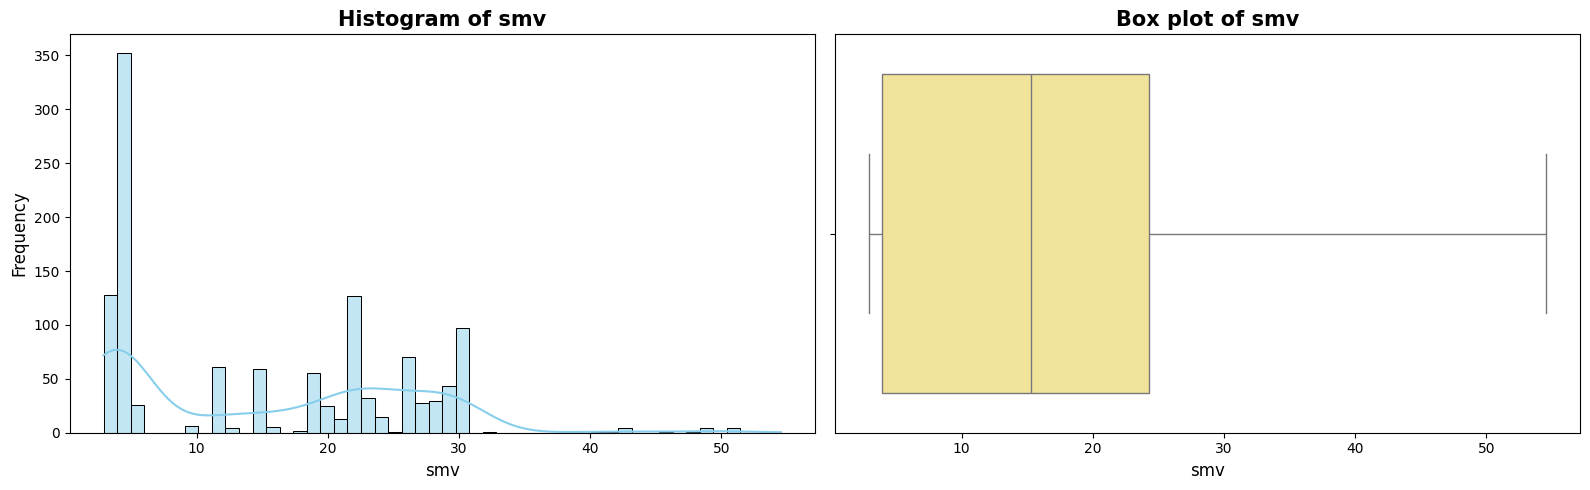

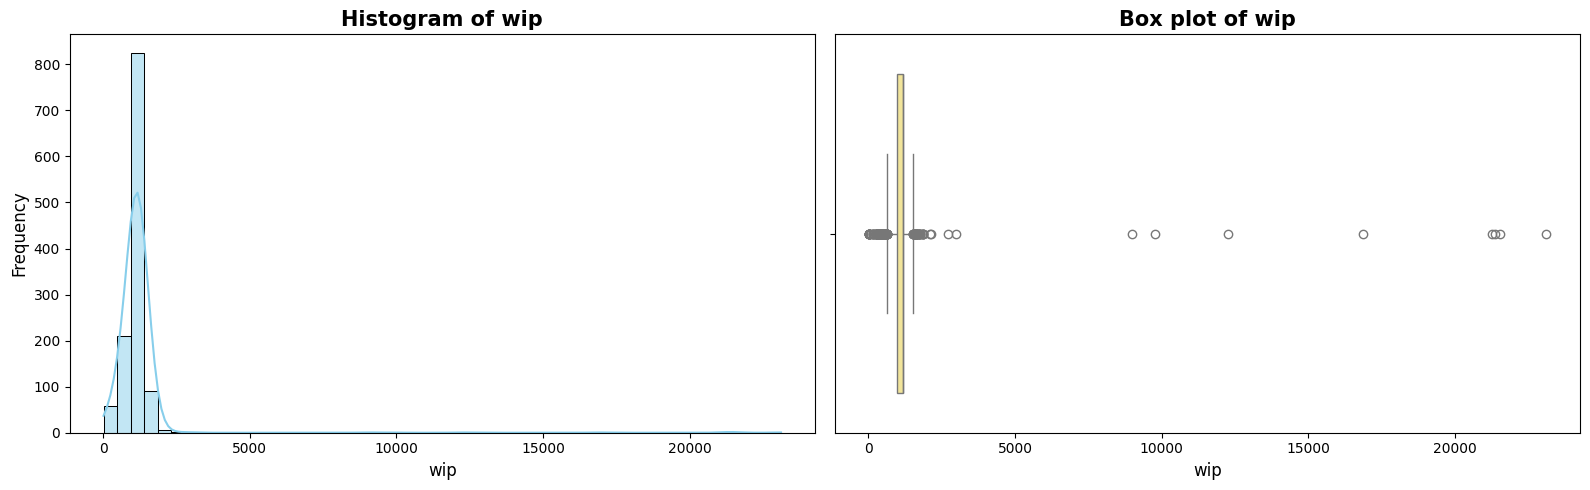

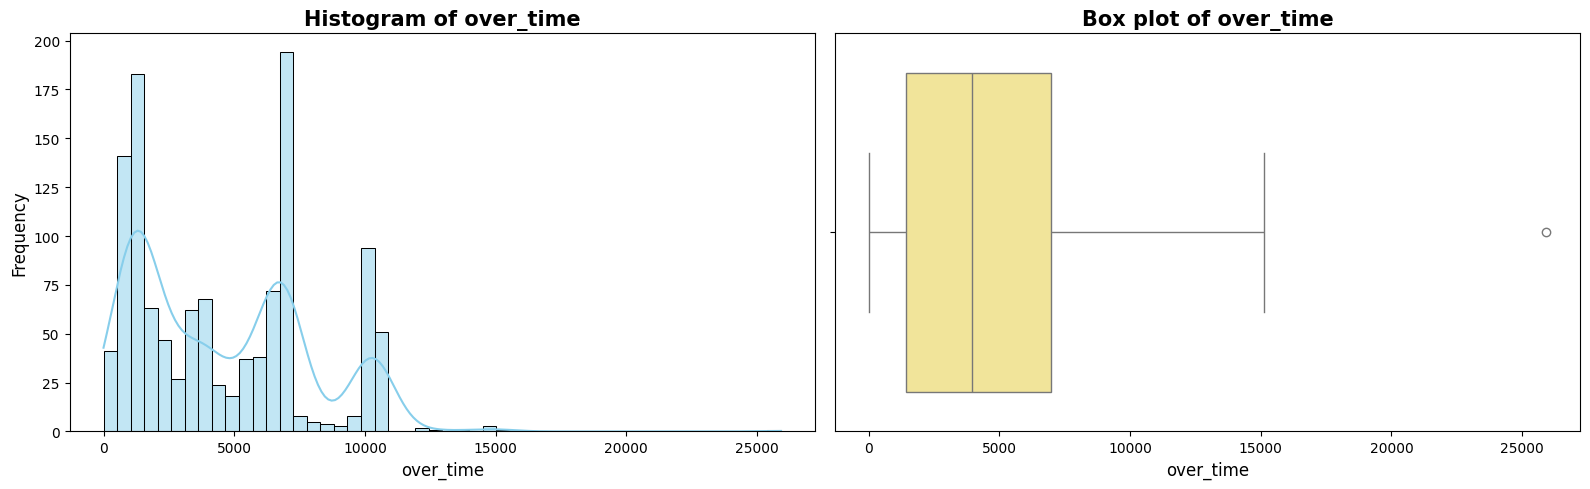

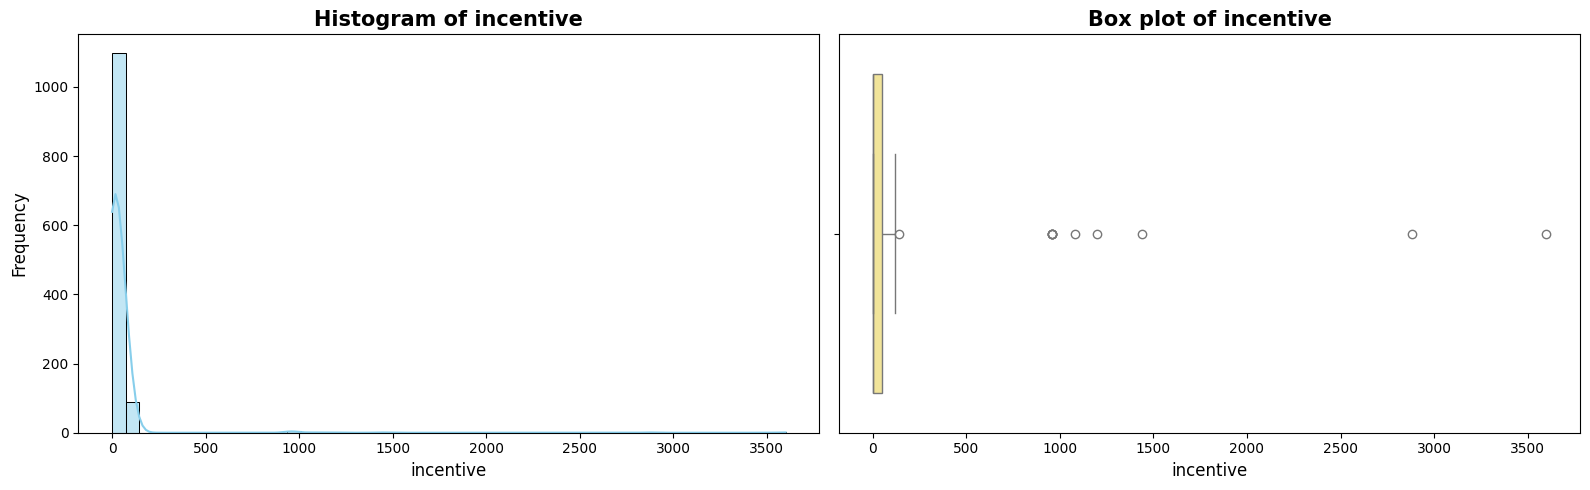

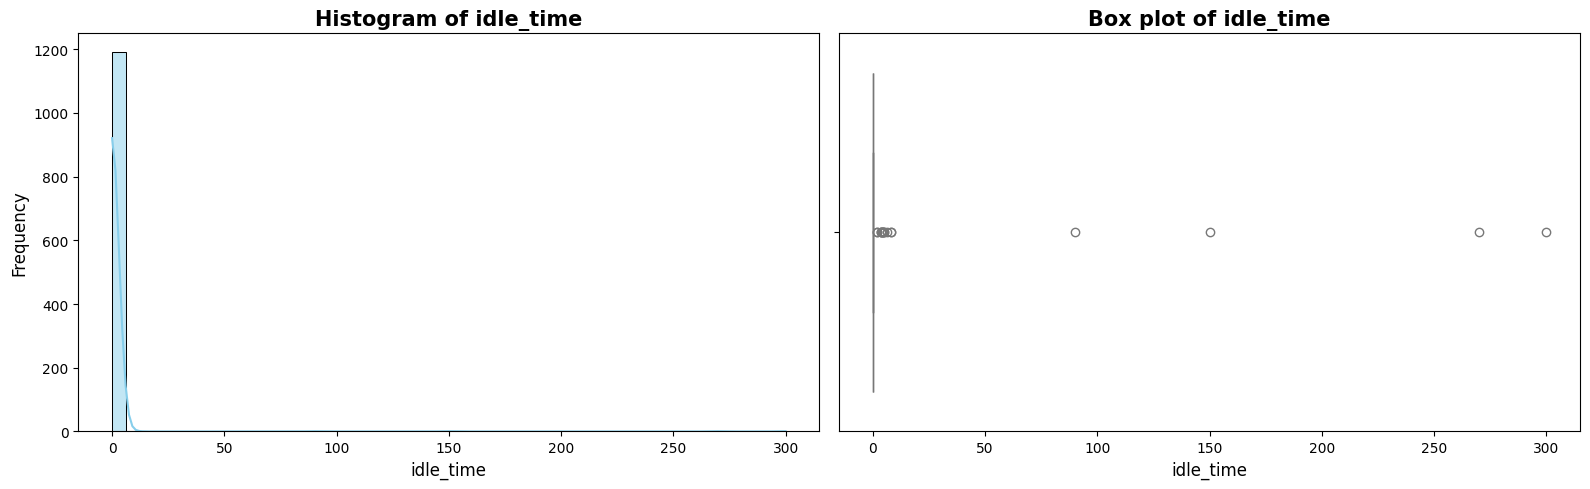

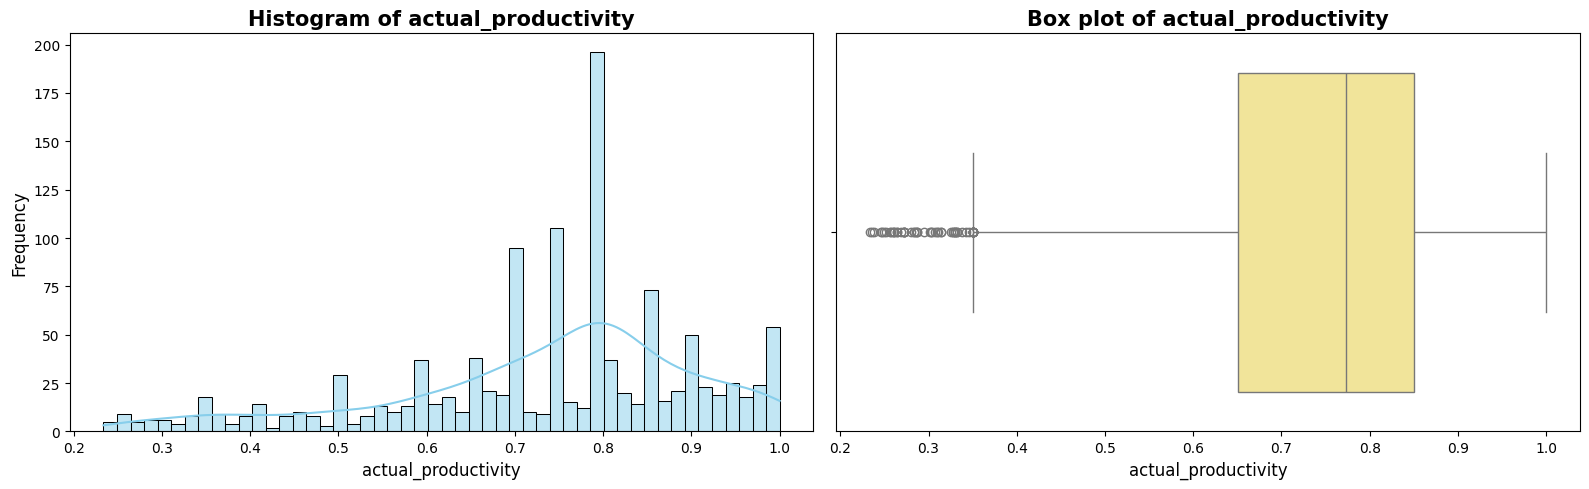

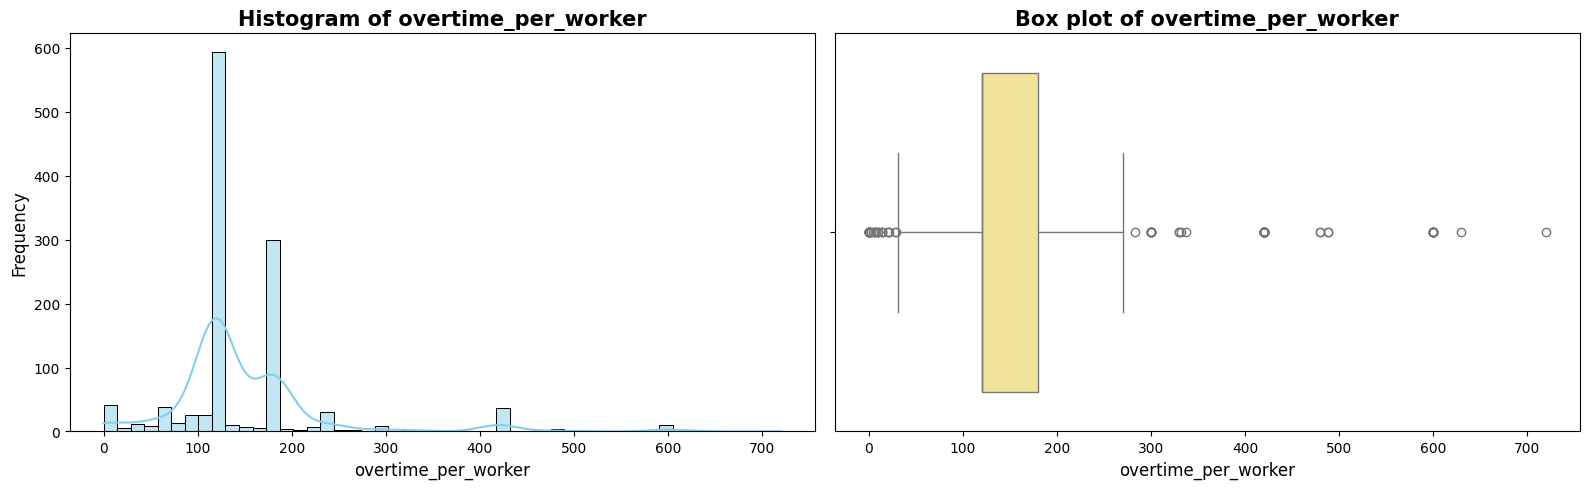

In [262]:
num_cols = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'actual_productivity', 'overtime_per_worker']
plot_numerics(df[num_cols])

The distribution of targeted productivity implies that teams are expected to perform at a high level, with majority of the data points falling between 0.7 and 0.8. As these are target values in a production setting, it is expected that they are set at a high level to ensure production efficiency.

On the other hand, actual productivity is more spread out, with a wider range of values possibly indicating that teams are unable to meet the high targets set for them. This could be due to various factors such as lack of incentives, high idle time, or high overtime.

Incentive and idle_time have mostly 0 values. This indicates that incentives are rarely given and production interruptions are infrequent.

Finally, overtime_per_worker shows that teams tend to work overtime, with most values falling between 100 to 200 minutes.

Now, we will look at the correlation between the numerical features to see if there are any strong correlations between the features.

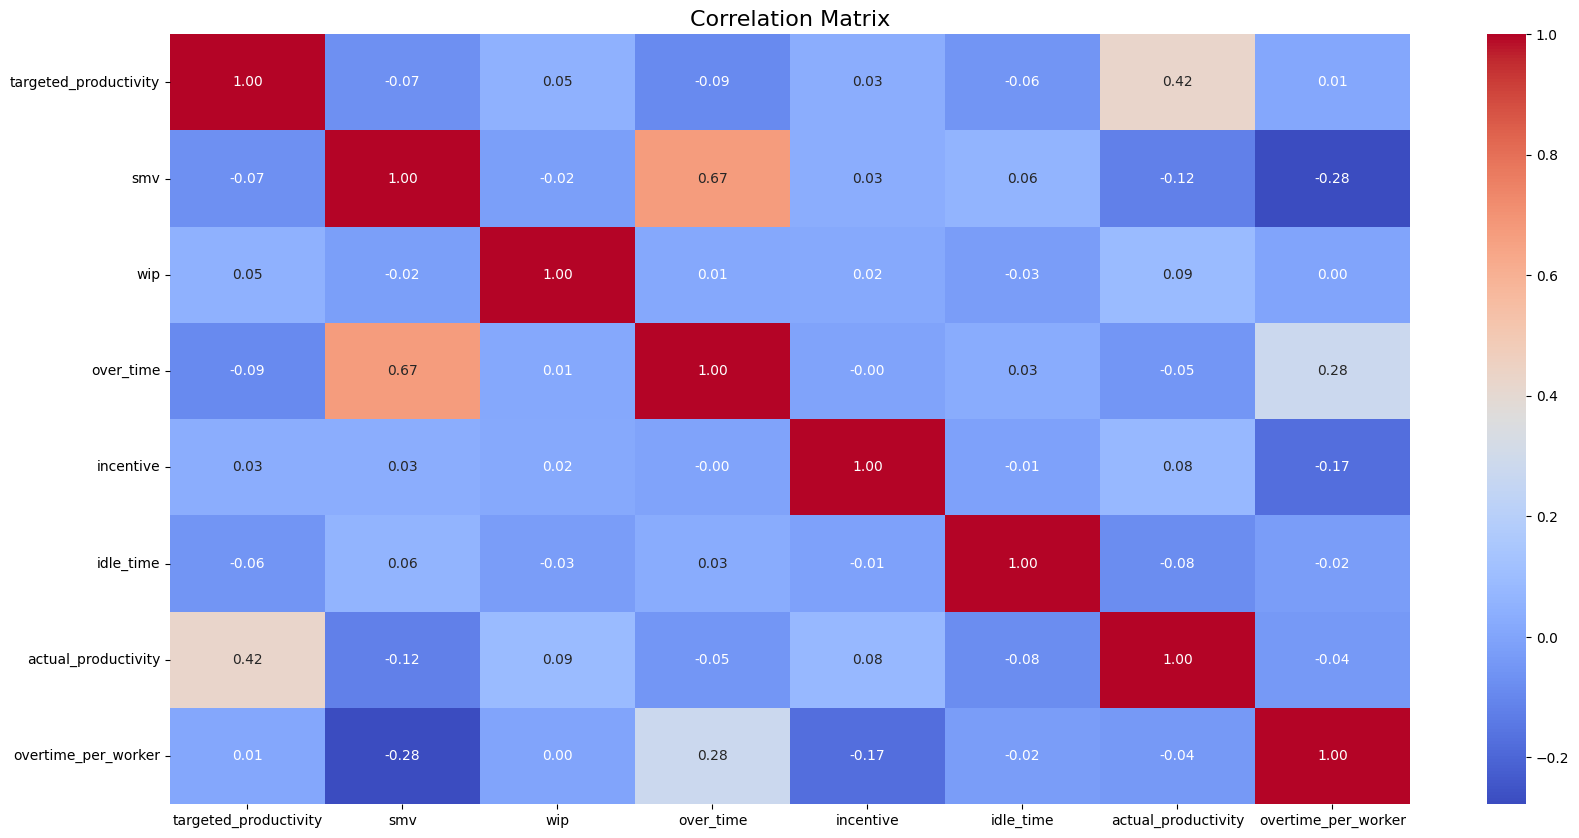

In [263]:
correlation_matrix = df[num_cols].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

Based from the correlation matrix, we can see that most of the features have a weak correlation with each other. The highest correlation is between 'over_time' and 'smv' implying that the workers are more likely to work overtime if the tasks for the day are more time-consuming.

## V-B. Productivity with regards to Teams and Departments (Orrin)

In this section, we want to look at how productivity varies with respect to teams and departments.

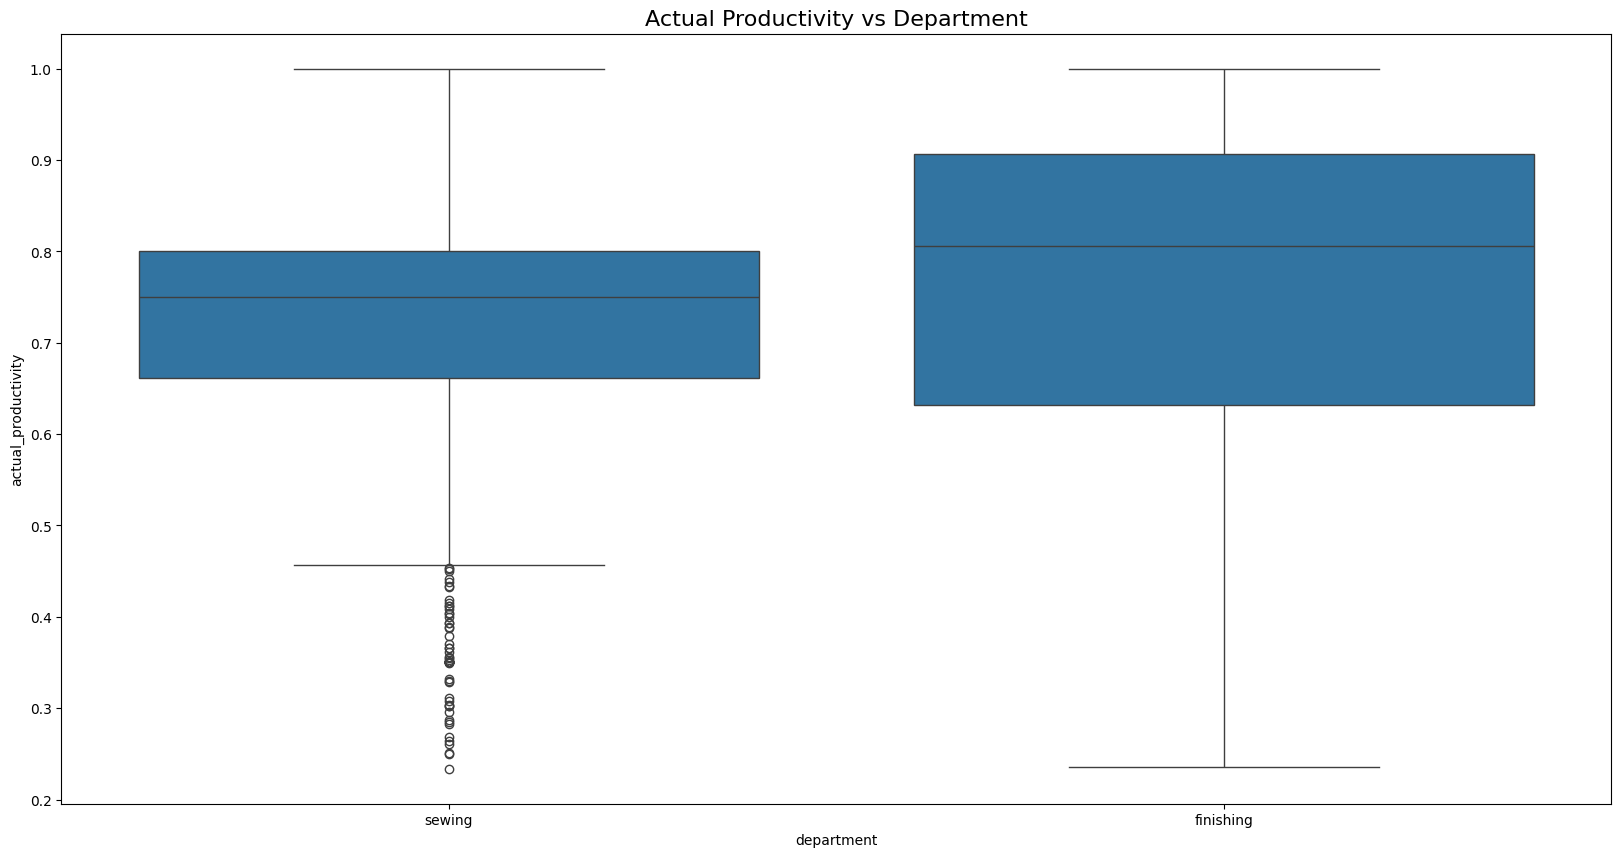

In [264]:
# actual productivity vs department
plt.figure(figsize=(20, 10))
sns.boxplot(x='department', y='actual_productivity', data=df_cleaned)
plt.title("Actual Productivity vs Department", fontsize=16)
plt.show()

We can see that the finishing department has a higher median productivity than the sewing department but it also has higher variability. Furthermore, the sewing department has multiple outliers on the lower end of the productivity scale.

To gain more insights, we look into the productivity of each team in the sewing and finishing departments. 

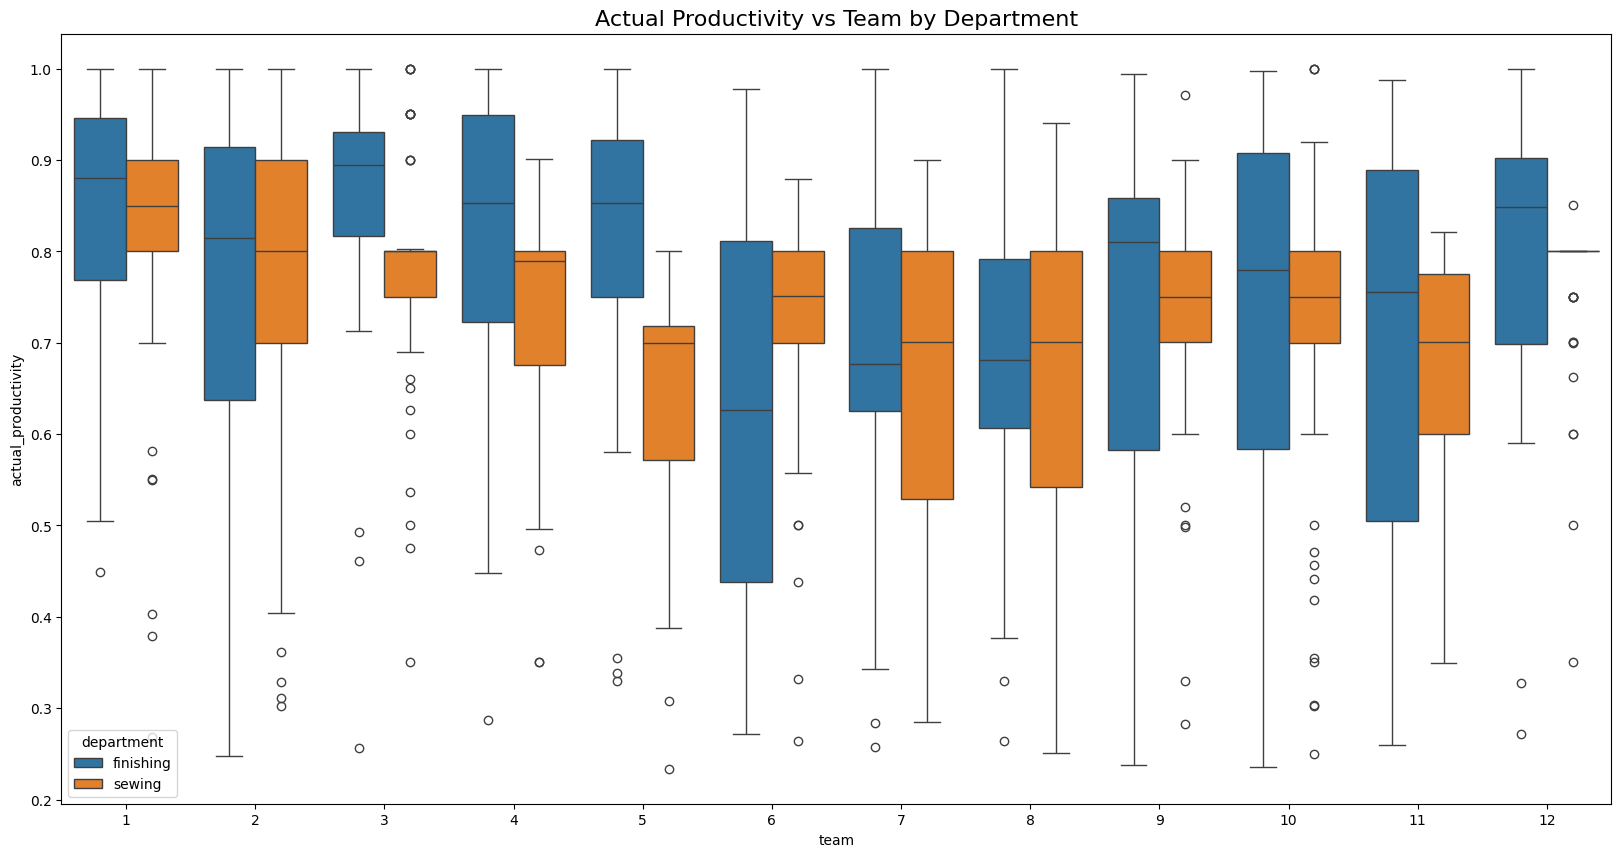

In [265]:
# actual productivity vs team by department
plt.figure(figsize=(20, 10))
sns.boxplot(x='team', y='actual_productivity', hue='department', data=df_cleaned)
plt.title("Actual Productivity vs Team by Department", fontsize=16)
plt.show()

The finishing department consistently shows higher median productivity with less variability, while the sewing department has lower productivity and more extreme outliers, indicating greater inconsistency. 

Team 6 of the finishing department and team 5 of the sewing department stand out as underperformers.

Since there is a target productivity set for each team, we can compare the actual productivity with the target productivity to see how well each team is performing relative to the target.

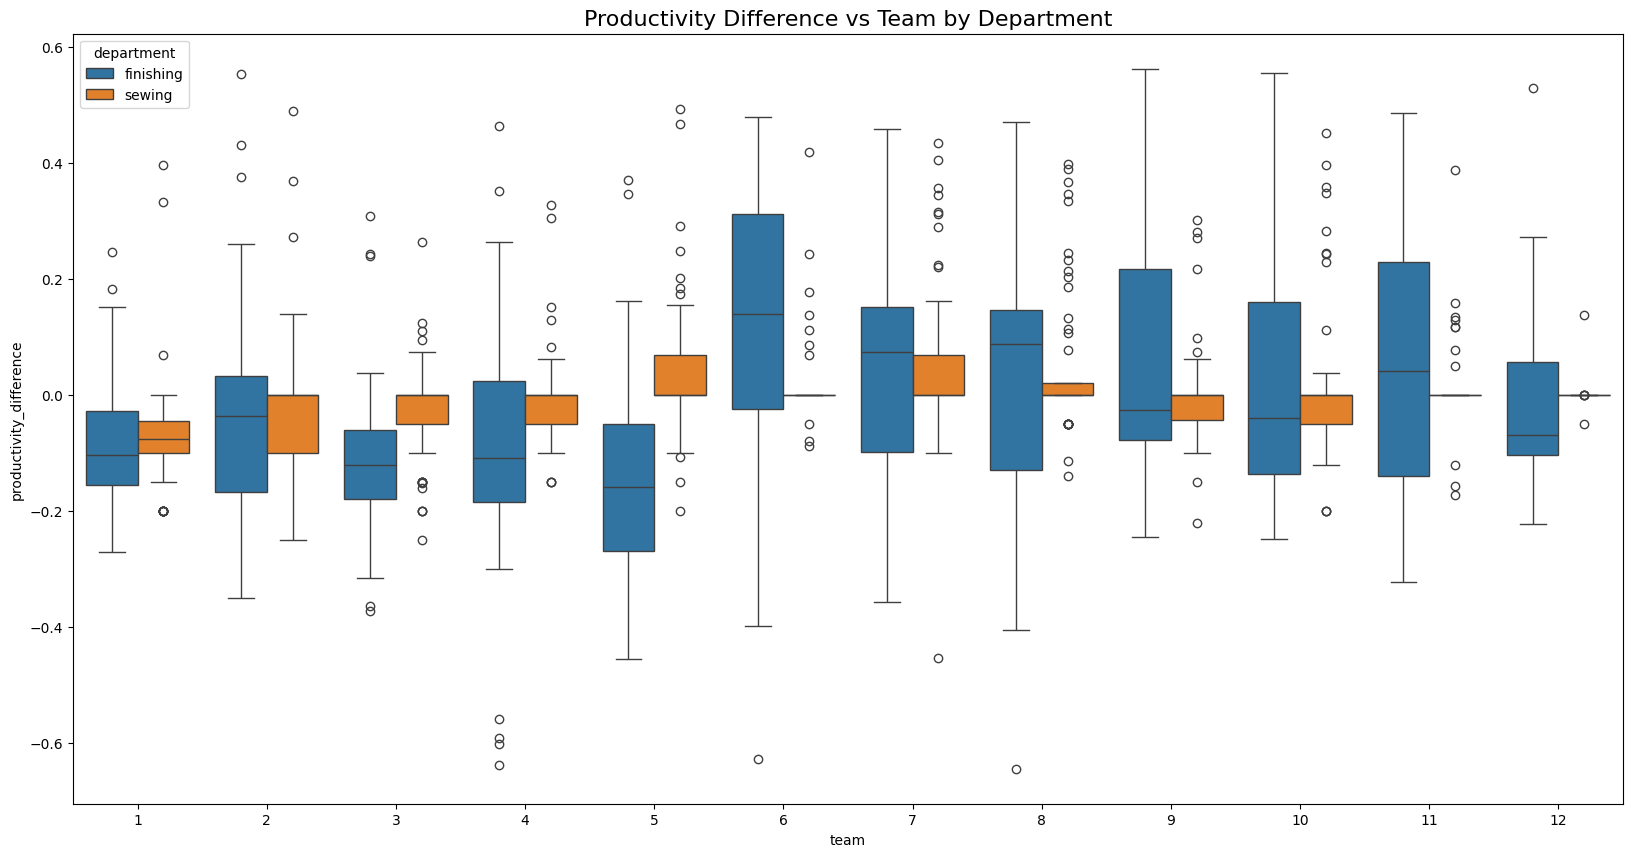

In [266]:
# productivity diff per team by department
df_cleaned['productivity_difference'] = df_cleaned['targeted_productivity'] - df_cleaned['actual_productivity']
plt.figure(figsize=(20, 10))
sns.boxplot(x='team', y='productivity_difference', hue='department', data=df_cleaned)
plt.title("Productivity Difference vs Team by Department", fontsize=16)
plt.show()

Despite standing out as having less productivity, team 6 of the finishing department and team 5 of the sewing department tend to reach their target productivity. On the other hand, higher productivity teams like team 1 of both departments tend to fall short of their target productivity.

Now we check the distribution of workers in each department to see if there are any imbalances in the number of workers in each department.

In [267]:
# number of workers per team by department in table format
workers_per_team = df_cleaned.groupby(['team', 'department'])['no_of_workers'].mean().reset_index()
workers_per_team = workers_per_team.pivot(index='team', columns='department', values='no_of_workers')
workers_per_team

department  finishing     sewing
team                            
1            9.673469  57.142857
2           11.673077  55.368421
3           12.243243  56.862069
4           13.456522  57.305085
5            9.742857  57.206897
6            9.000000  34.661017
7            9.926829  57.218182
8            9.075472  56.446429
9            8.869565  56.086207
10          10.372093  54.000000
11           9.310345  53.186441
12           9.175000  33.813559

Apart from teams 6 and 12, the number of workers in each team is relatively balanced. So we look at other factors that may influence productivity such as incentives.

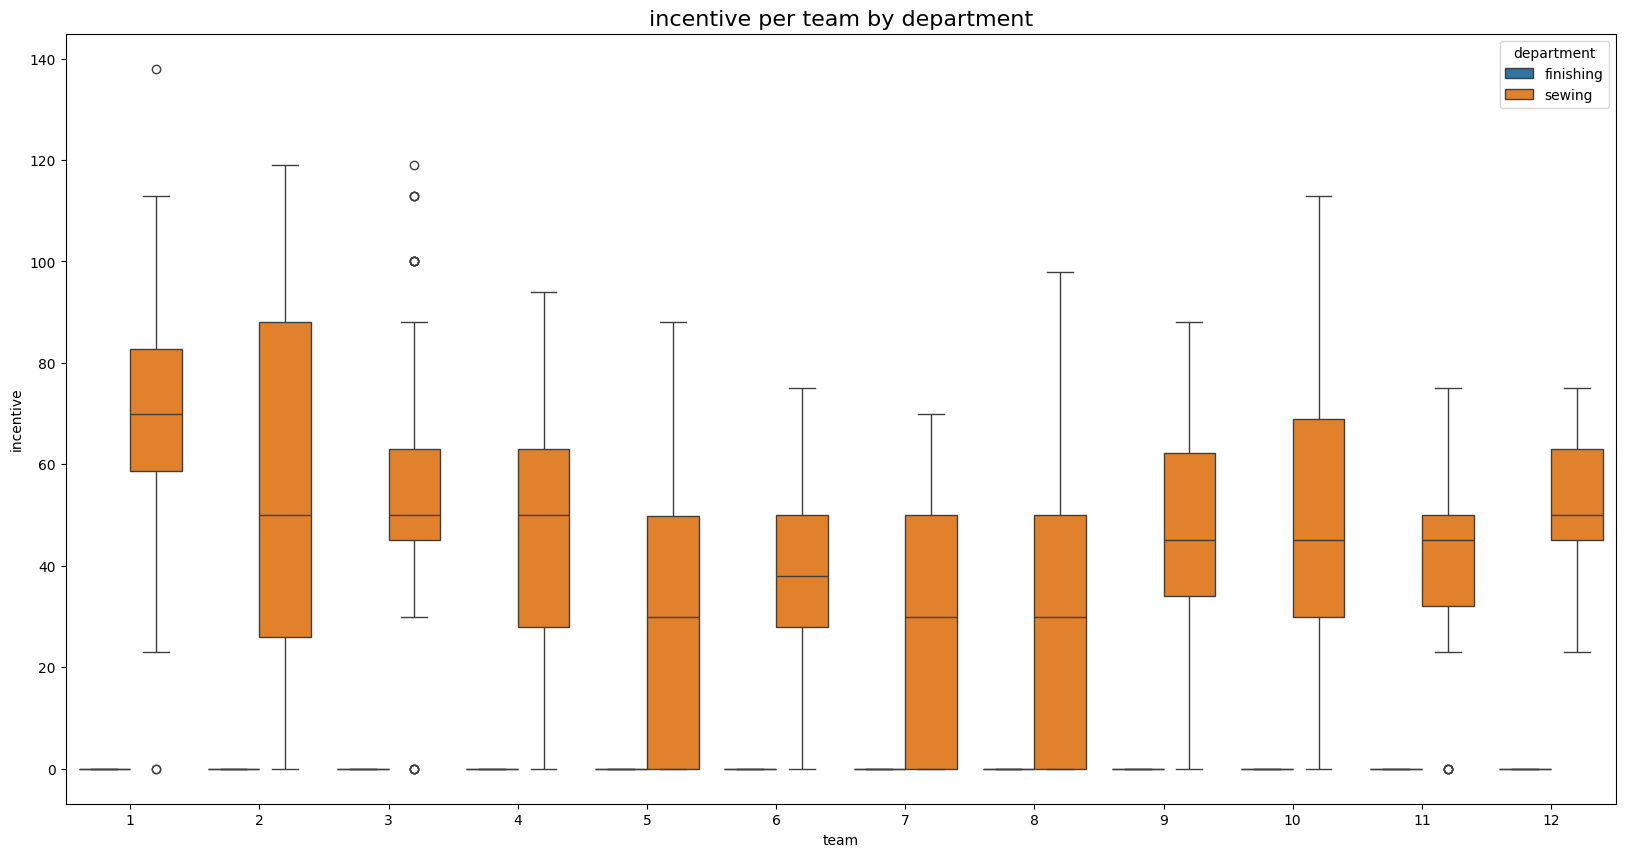

In [268]:
#could the issue be related to incentives?
df2 = df_cleaned.copy()
# remove incentive outliers
df2 = df2[df2['incentive'] < 700]

plt.figure(figsize=(20, 10))
sns.boxplot(x='team', y='incentive', hue='department', data=df2)
plt.title("incentive per team by department", fontsize=16)
plt.show()

It seems that the finishing department rarely gets incentives while the sewing department gets incentives more frequently. Though it seems that incentives do not have a significant impact on whether or not a team reaches its target productivity. However, there does seem to be a slight positive correlation between incentives and productivity.

To further dive into why some teams are unable to meet their target productivity, we look at the SMV of each team.

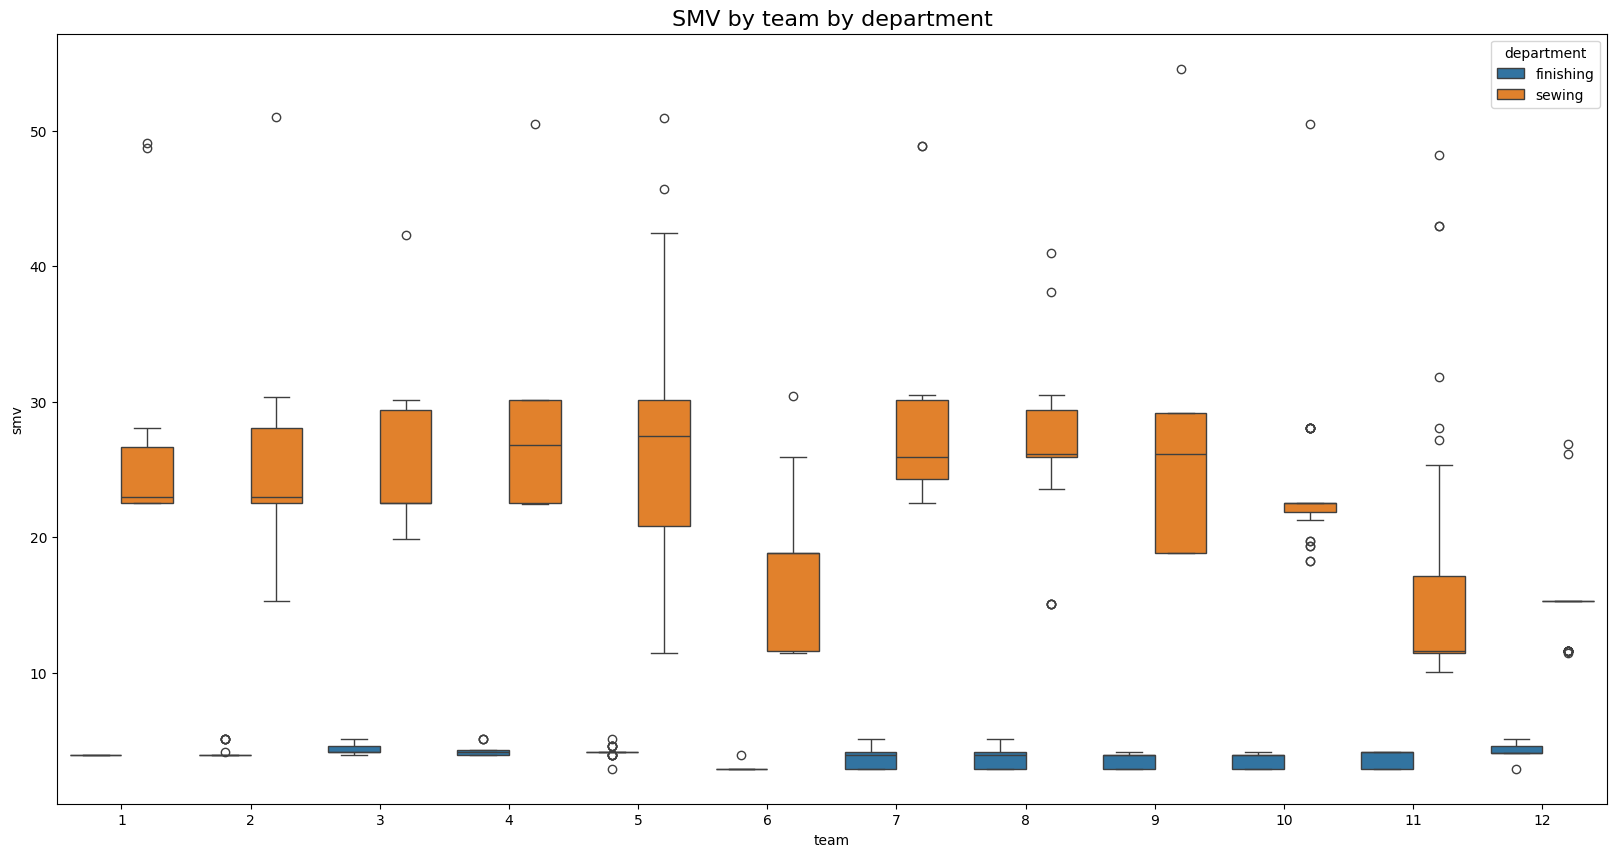

In [269]:
#perhaps the issue is in the smv
plt.figure(figsize=(20, 10))
sns.boxplot(x='team', y='smv', hue='department', data=df_cleaned)
plt.title("SMV by team by department", fontsize=16)
plt.show()

We can see that the SMV of the sewing department is generally higher than that of the finishing department. This explains the larger workforce in the sewing department as the tasks are more time-consuming. However, SMV does not seem to have a significant impact on productivity based on the graphs.

## V-C. Day of the Week and Quarter of the Month to Actual Productivity (Tean)

### Description

In the Philippines, a company typically pays its workers at the end of the 2nd and 4th week of every month. With this, it can be speculated that the actual productivity of the workers will be affected when in the proximity of those times as they anticipate receiving their paychecks. Additionally, with the chosen representation, it will also be possible to analyze actual productivity as the month goes by.

Relevant fields of the EDA:

Days of the Week:
- 'day_Monday'
- 'day_Tuesday'
- 'day_Wednesday'
- 'day_Thursday'
- 'day_Saturday'
- 'day_Sunday'

Quarters of the Month:
- 'quarter_Quarter1'
- 'quarter_Quarter2'
- 'quarter_Quarter3'
- 'quarter_Quarter4'
- 'quarter_Quarter5'

Actual Productivity:
- 'actual_productivity'

### Data Transformation

Seclude the relevant fields for the EDA.

In [270]:
day_quarter_productivity_df = df[['day_Monday', 'day_Tuesday', 'day_Wednesday', 'day_Thursday', 'day_Saturday', 'day_Sunday', 'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5', 'actual_productivity']]

day_quarter_productivity_df

day_Monday  day_Tuesday  day_Wednesday  day_Thursday  day_Saturday  \
0          False        False          False          True         False   
1          False        False          False          True         False   
2          False        False          False          True         False   
3          False        False          False          True         False   
4          False        False          False          True         False   
...          ...          ...            ...           ...           ...   
1192       False        False           True         False         False   
1193       False        False           True         False         False   
1194       False        False           True         False         False   
1195       False        False           True         False         False   
1196       False        False           True         False         False   

      day_Sunday  quarter_Quarter1  quarter_Quarter2  quarter_Quarter3  \
0          False              True             False             False   
1          False              True             False             False   
2          False              True             False             False   
3          False              True             False             False   
4          False              True             False             False   
...          ...               ...               ...               ...   
1192       False             False              True             False   
1193       False             False              True             False   
1194       False             False              True             False   
1195       False             False              True             False   
1196       False             False              True             False   

      quarter_Quarter4  quarter_Quarter5  actual_productivity  
0                False             False             0.940725  
1                False             False             0.886500  
2                False             False             0.800570  
3                False             False             0.800570  
4                False             False             0.800382  
...                ...               ...                  ...  
1192             False             False             0.628333  
1193             False             False             0.625625  
1194             False             False             0.625625  
1195             False             False             0.505889  
1196             False             False             0.394722  

[1197 rows x 12 columns]

Transform the relevant fields into more easily processable values.

In [271]:
# Ensure we are working with a copy of the DataFrame
day_quarter_productivity_df = day_quarter_productivity_df.copy()

# Make day_of_week and quarter columns
day_quarter_productivity_df.loc[:, 'day_of_week'] = day_quarter_productivity_df[['day_Monday', 'day_Tuesday', 'day_Wednesday', 'day_Thursday', 'day_Saturday', 'day_Sunday']].idxmax(axis=1).str.split('_').str[1]
day_quarter_productivity_df.loc[:, 'quarter'] = day_quarter_productivity_df[['quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5']].idxmax(axis=1).str.split('_').str[1]

# Drop the one-hot encoded columns
day_quarter_productivity_df = day_quarter_productivity_df.drop(['day_Monday', 'day_Tuesday', 'day_Wednesday', 'day_Thursday', 'day_Saturday', 'day_Sunday', 'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5'], axis=1)

day_quarter_productivity_df

actual_productivity day_of_week   quarter
0                0.940725    Thursday  Quarter1
1                0.886500    Thursday  Quarter1
2                0.800570    Thursday  Quarter1
3                0.800570    Thursday  Quarter1
4                0.800382    Thursday  Quarter1
...                   ...         ...       ...
1192             0.628333   Wednesday  Quarter2
1193             0.625625   Wednesday  Quarter2
1194             0.625625   Wednesday  Quarter2
1195             0.505889   Wednesday  Quarter2
1196             0.394722   Wednesday  Quarter2

[1197 rows x 3 columns]

### Data Representation and Visualization

Pivot Tables specialize in representing grouped data of many dimensions into a neat table format, where the rows and columns are the groupings and the cells are the featured values.
As the EDA features 1 quantitative and 2 qualitative features, a Pivot Table should be the most fitting representation. 
This lets us create a table who's columns are the days of the week, rows are the quarters of the month, and cells are the means of the actual productivities grouped by the columns and rows.

In [272]:
# Create a pivot table
pivot_table = day_quarter_productivity_df.pivot_table(
    values='actual_productivity', 
    index='quarter', 
    columns='day_of_week', 
    aggfunc='mean'
)

# Sort the days of the week
pivot_table = pivot_table[['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday']]

pivot_table

day_of_week    Sunday    Monday   Tuesday  Wednesday  Thursday  Saturday
quarter                                                                 
Quarter1     0.744070  0.746133  0.751094   0.755135  0.749143  0.761843
Quarter2     0.748086  0.739473  0.760480   0.738996  0.719283  0.741212
Quarter3     0.677855  0.706273  0.700208   0.695238  0.722660  0.730730
Quarter4     0.716707  0.737127  0.737412   0.712093  0.654613  0.700899
Quarter5          NaN       NaN       NaN        NaN  0.791633  0.854926

To better visualize the Pivot Table, a Heat Map can be made to highlight the trends of the data in each grouping.

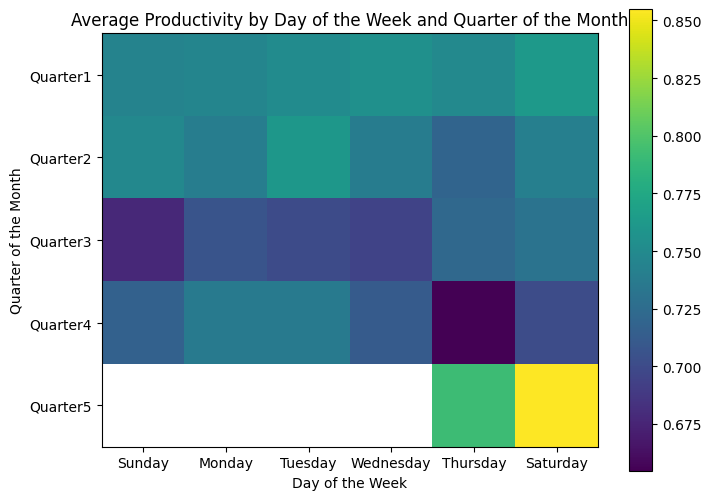

In [273]:
# Plot the pivot table
plt.figure(figsize=(8, 6))
plt.imshow(pivot_table, cmap='viridis')
plt.colorbar()
plt.xticks(np.arange(6), pivot_table.columns)
plt.yticks(np.arange(5), pivot_table.index)
plt.xlabel('Day of the Week')
plt.ylabel('Quarter of the Month')
plt.title('Average Productivity by Day of the Week and Quarter of the Month')
plt.show()

### Findings

- Actual productivity of workers decreases as the month goes by, with the later half of the month being darker than the start. 
- The start of Quarter 3 (0.677855) and the end of Quarter 4 (0.654613) are especially dark, suggesting that the workers are less productive after receiving their 1st monthly paycheck and before receiving their 2nd monthly paycheck.
- Quarter 5 is very productive as its colors are way brighter. However, this may be an outlier due to the only Quarter 5 days being 1/29/2015 (0.791633) and 1/31/2025 (0.854926).

## V-D. Overtime in relation to Standard Minute Value and Number of Workers for each Department (Tan Ai)

### Description

Considering standard minute value was the amount of time it'd take to complete 1 work of an order, I was interested in seeing how overtime occurs in both departments based on the manpower they have, I split it into the two separate departments as the values for SMV varied greatly between departments, sensible enough as the finishing departments work such as trimming, button attachment, ironing, etc. are much less work (“Functions of Finishing Department in Garment Industry,” 2015) when compared to the lengthy process of sewing the garments together.

Relevant EDA fields:
- Standard Minute Value (smv)
- Overtime (over_time)
- Number of Workers (no_of_workers)

In [32]:
df.describe()

team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000   1197.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1395.647261   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    970.000000   
50%       6.000000               0.750000    15.260000   1190.465991   
75%       9.000000               0.800000    24.260000   1190.465991   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.000000     0.000000   
50%     3960.000000     0.000000     0.000000     0.000000   
75%     6960.000000    50.000000     0.000000     0.000000   
max    25920.000000  3600.000000   300.000000    45.000000   

       no_of_style_change  no_of_workers  actual_productivity  \
count         1197.000000    1197.000000          1197.000000   
mean             0.150376      34.551378             0.734461   
std              0.427848      22.152559             0.173380   
min              0.000000       2.000000             0.233705   
25%              0.000000       9.000000             0.650307   
50%              0.000000      34.000000             0.773333   
75%              0.000000      57.000000             0.850253   
max              2.000000      89.000000             1.000000   

       overtime_per_worker  
count          1197.000000  
mean            148.533406  
std              86.042508  
min               0.000000  
25%             120.000000  
50%             120.000000  
75%             180.000000  
max             720.000000

In [33]:
sewing_smv_nw_overtime_df = df[(df["department_sewing"] == True)][['smv', 'no_of_workers', 'over_time']]

finishing_smv_nw_overtime_df = df[(df["department_finishing"] == True)][['smv', 'no_of_workers', 'over_time']]

In [38]:
sewing_smv_nw_overtime_df.head()


smv  no_of_workers  over_time
0  26.16           59.0       7080
2  11.41           30.0       3660
3  11.41           30.0       3660
4  25.90           56.0       1920
5  25.90           56.0       6720

In [34]:
sewing_smv_nw_overtime_df = sewing_smv_nw_overtime_df.copy()

finishing_smv_nw_overtime_df = finishing_smv_nw_overtime_df.copy()

### Data Representation and Visualization

3D Scatterplots allow the relationship between variables to be observed in 3d space, considering that we have 3 quantitative variables this method of visualization should be fitting.

In [84]:
x = finishing_smv_nw_overtime_df['smv']
y = finishing_smv_nw_overtime_df['no_of_workers']
z = finishing_smv_nw_overtime_df['over_time']

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, c=z, cmap='viridis')

ax.set_xlabel('Standard Minute Value')
ax.set_ylabel('Number of Workers')
ax.set_zlabel('Overtime')

plt.show()

NameError: name 'finishing_smv_nw_overtime_df' is not defined

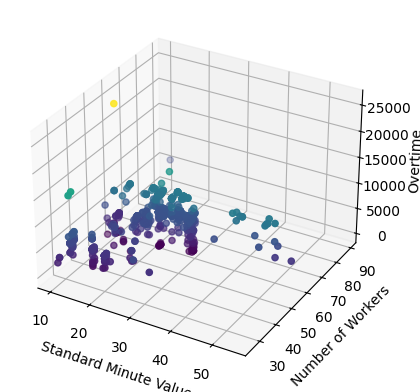

In [36]:
x = sewing_smv_nw_overtime_df['smv']
y = sewing_smv_nw_overtime_df['no_of_workers']
z = sewing_smv_nw_overtime_df['over_time']

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, c=z, cmap='viridis')

ax.set_xlabel('Standard Minute Value')
ax.set_ylabel('Number of Workers')
ax.set_zlabel('Overtime')

plt.show()

### Findings

- In both departments there are outliers that have an extreme amount of overtime.
- The number of workers in the finishing department is lower than the number in the sewing department
- Overtime has a tendency to become lower when the smv is low and there are more workers for the sewing department.
- Despite average smv in the finishing department, the number of workers seem to correlate with increasing overtime.

# VI. Initial Model Training

## VI-0. Train Test Set Separation

`X` is the feature table and will all features except `actual_productivity`.

`y` is the label of the feature table and will only contain `actual_productivity`.

In [30]:
X = df.drop(columns=['actual_productivity']).values
y = df['actual_productivity'].values

print('X ', X.shape)
print('y ', y.shape)

X  (1197, 24)
y  (1197,)


Divide the dataset into train and test sets, where `20%` of the data will be placed in the test set.

Random state is set to `69` for uniformity.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

Display the shape of the train, validation, and test sets.

In [32]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (957, 24)
y_train (957,)
X_test (240, 24)
y_test (240,)


Display head and columns to check values

In [33]:
print(pd.DataFrame(X_train).head())

   0     1      2            3      4   5    6  7  8     9           10  \
0   9  0.75   3.94  1190.465991    960   0  0.0  0  0   8.0       120.0   
1  11  0.35  12.52        287.0  25920  38  0.0  0  0  54.0       480.0   
2   4   0.8  22.52      23122.0   5940  50  0.0  0  0  56.0  106.071429   
3   9   0.8   3.94  1190.465991   1800   0  0.0  0  0  10.0       180.0   
4   2   0.8  28.08        749.0  10350  63  0.0  0  0  57.0  181.578947   

      11     12     13     14     15     16     17     18     19     20  \
0   True  False  False  False  False  False  False   True   True  False   
1  False   True  False  False  False   True  False  False  False   True   
2  False   True   True  False  False  False  False  False   True  False   
3   True  False  False   True  False  False  False  False  False  False   
4  False   True  False   True  False  False  False  False  False   True   

      21     22     23  
0  False  False  False  
1  False  False  False  
2  False  False  False 

As sklearn's StandardScaler standardizes all feature columns regardless of datatype, need to exclude boolean columns from the standardization to maintain their values

Get all non-boolean columns for standardization

In [41]:
# Get all columns in X_train that are not boolean
non_boolean_columns = []
for i in range(X_train.shape[1]):
    if len(np.unique(X_train[:, i])) != 2:
        non_boolean_columns.append(i)

non_boolean_columns

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Standardize the non-boolean columns based on X_train.

In [42]:
# Scale all columns that are not boolean
ct = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), non_boolean_columns)
    ],
    remainder='passthrough'
)
ct.fit(X_train)

X_train_scaled = ct.transform(X_train)
X_test_scaled = ct.transform(X_test)

Display head and columns of standardizes datasets to check values

In [43]:
print(pd.DataFrame(X_train_scaled).head())

         0         1         2          3         4         5         6   \
0  0.727334  0.217848  -1.00221   0.008041 -1.062481 -0.228326 -0.058383   
1  1.298811 -3.747545 -0.228423  -0.646291  6.382751 -0.011269 -0.058383   
2 -0.701358  0.713522  0.673426  15.891862  0.422986  0.057276 -0.058383   
3  0.727334  0.713522  -1.00221   0.008041 -0.811921 -0.228326 -0.058383   
4 -1.272835  0.713522  1.174854  -0.311689  1.738429  0.131532 -0.058383   

        7         8         9         10     11     12     13     14     15  \
0 -0.11777 -0.344064 -1.190787 -0.327128   True  False  False  False  False   
1 -0.11777 -0.344064  0.887508  3.802866  False   True  False  False  False   
2 -0.11777 -0.344064  0.977869  -0.48692  False   True   True  False  False   
3 -0.11777 -0.344064 -1.100427  0.361204   True  False  False   True  False   
4 -0.11777 -0.344064  1.023049  0.379318  False   True  False   True  False   

      16     17     18     19     20     21     22     23  
0  False

Function to display MSE, RMSE, MAE, and R2 given a regressor

In [37]:
def getModelPerformance(model, model_name:str, scaled:bool):
    
    # Predictions
    if scaled:
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
        
    else:
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
    
    # Clip the values to be between 0 and 1
    y_train_pred = np.clip(y_train_pred, 0, 1)
    y_test_pred = np.clip(y_test_pred, 0, 1)

    # MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    print(model_name + ' Train MSE:', train_mse)
    print(model_name + ' Test MSE :', test_mse)
    print('')
    print(model_name + ' Train RMSE:', np.sqrt(train_mse))
    print(model_name + ' Test RMSE :', np.sqrt(test_mse))
    print('')
    print(model_name + ' Train MAE:', mean_absolute_error(y_train, y_train_pred))
    print(model_name + ' Test MAE :', mean_absolute_error(y_test, y_test_pred))
    print('')
    print(model_name + ' Train R^2:', r2_score(y_train, y_train_pred))
    print(model_name + ' Test R^2 :', r2_score(y_test, y_test_pred))

## VI-A. Linear Regression


Linear regression is a statistical and machine learning technique used to model the relationship between one or more independent variables (predictors) and a continuous dependent variable (target). It assumes a linear relationship between the predictors and the target, with the goal of finding the best-fitting line that minimizes the error between the predicted and actual values. Linear regression is simple to implement, computationally efficient, and interpretable, making it suitable for understanding relationships and making predictions. It performs well when the relationship between variables is approximately linear and is supported by statistical measures to evaluate the model's performance. However, it has limitations, such as sensitivity to outliers, reliance on assumptions like linearity and constant variance of errors, and difficulty handling multicollinearity or high-dimensional data. It may also struggle to capture complex or nonlinear relationships without additional transformations or feature engineering. 

In [ ]:
initial_linear_regression = LinearRegression()

Main Hyperparameters for Linear Regression

- fit_intercept: [True]
- normalize: [False] (deprecated in version 1.0, removed in 1.2)
- copy_X: [True]
- n_jobs: [None]

by setting normalize as true, Linear regression can benefit from feature scaling when the input variables have different scales (e.g., one feature is measured in meters and another in kilometers). It is important to note that Standard Scaling should be used instead of the old normalize hyperparameter in scikit linear regression.

Copy_X controls whether the model should make a copy of the feature matrix 𝑋 before fitting the model. By default, it ensures that the original data is not modified during the fitting process. If set to False, it can save memory if you're working with large datasets

In [ ]:
initial_linear_regression.fit(X_train_scaled, y_train)

In [ ]:
getModelPerformance(initial_linear_regression, 'Linear Regression', False)

## VI-B. Random Forest

Decision Trees have been used for classification and regression problems, however it faces the issue of being prone to bias and overfitting due to the nature of the algorithm. Therefore to remedy this we have decided to make use of the Random Forest model which is an ensemble learning method that makes use of decision trees.

The way random forests are able to improve its accuracy greatly over decision trees is due to various techniques with the first being bootstrapping to create a new dataset which can sample duplicates of the original dataset, and instead of considering all features of the dataset per split (i.e. all 24 columns for our dataset) it only considers a random subset of features (though the default values for sklearn consider all features), these two techniques in particular are what allow the individual decision trees to have little correlation with one another which helps with preventing overfitting.

Aggregating the decision of the multiple trees together leads to bagging, in the case of classification a majority vote is used to classify the unknown instance, whereas in regression the outputs of the trees will be averaged to get the value.

In [34]:
initial_rf_regressor = RandomForestRegressor(random_state=random_seed)

Parameters:
- n_estimators: [100]
- max_depth: [None]
- min_samples_split: [2]
- min_samples_leaf: [1]
- min_weight_fraction_leaf: [0.0]
- max_features: [1.0]
- max_leaf_nodes: [None]
- min_impurity_decrease: [0.0]
- bootstrap: [True]
- oob_score: [False]
- n_jobs: [None]
- random_state: [69]
- verbose: [1]
- warm_start: [False]
- ccp_alpha: [0.0]
- max_samples: [None]
- monotonic_cst: [None]

The parameters above are all of the parameters that can be modified when creating the RandomForestRegressor(), however the main hyperparameters are:
- n_estimators
- max_depth
- max_features

Where n_estimators refers to the total number of trees that will be created by the model.

Where max_depth refers to the longest path that a model can create, which in its default state will create trees that go on until they are pure or until they reach min_samples_split.

Where max_features refers to the number of features to randomly sample at each split, which at default considers all features at each split (similar to a regular decision tree).

Some of these default values such as the n_estimators came from the paper that originally postulated the concept of the random forest (Breiman, 2001).

In [35]:
initial_rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=69)

In [38]:
getModelPerformance(initial_rf_regressor, 'Initial Random Forest Model', False)

Initial Random Forest Model Train MSE: 0.0019615031499284306
Initial Random Forest Model Test MSE : 0.018514849802299428

Initial Random Forest Model Train RMSE: 0.0442888603367532
Initial Random Forest Model Test RMSE : 0.13606928309614713

Initial Random Forest Model Train MAE: 0.026943753521431527
Initial Random Forest Model Test MAE : 0.079271717871125

Initial Random Forest Model Train R^2: 0.9361814665058318
Initial Random Forest Model Test R^2 : 0.32031061068997524


## VI-C. Neural Network

Neural Networks are a robust tool for predicting values due to their ability to capture complex, non-linear relationships between input features. 
With columns ranging from operational metrics like SMV, WIP, and over_time, to dynamic factors such as idle_time and no_of_style_change, Neural Networks can effectively process and learn from the intricate patterns and interactions among these variables. 
Additionally, their adaptability to various data scales and distributions makes them particularly suited to handle the diverse nature of the dataset, potentially leading to more accurate and insightful predictions of actual productivity. This capacity to model complex dependencies sets Neural Networks apart as a powerful predictive tool in this context.

To create the Neural Network model for the dataset, scikit-learn's Multi-layer Perceptron Regressor (MLP Regressor) will be used. 
It is a straightforward implementation of the supervised Neural Network model intended for simple use cases and learning, and it is complete with interconnected nodes, forwardpropagation, backpropagation, weight adjustment, and more.
Moreover, the MLP Regressor also comes with various hyperparameters that can be tuned to optimize performance and achieve high accuracy in predictive modeling tasks. (1.17. Neural Network Models (Supervised), n.d.).

SCRAPPED: Model would exploit clip and always go on top

Additionally, as the output of the regressor should only be between 0 and 1, to prevent it from having values beyond those, a custom MLPRegressor was made with with predictions being clipped at 0 and 1 before being returned.
By doing so, the model can train without needing to worry about going above or below the value ranges.

In [292]:
# class ClippedMLPRegressor(BaseEstimator, RegressorMixin):
    
#     def __init__(self, **kwargs):
#         self.model = MLPRegressor(**kwargs)
#         self.max_iter = self.model.max_iter
    
#     def fit(self, X, y):
#         self.model.fit(X, y)
#         return self
    
#     def partial_fit(self, X, y):
#         self.model.partial_fit(X, y)
#         return self
    
#     def get_params(self, deep: bool = True) -> dict:
#         return self.model.get_params(deep)
    
#     def predict(self, X):
#         predictions = self.model.predict(X)
#         return np.clip(predictions, 0, 1)

In [293]:
# Create MLPRegressor model
initial_nn_model = MLPRegressor(random_state=random_seed)

Main hyperparameters:
- Neurons and hidden layers: [100]
- Solver and Optimizer: ADAM
- Activation Function: ReLU
- Max Iterations: 200
- Initial Learning Rate: 0.001
- Learning Rate Change: constant
- Regularization Constant: 0.0001
- Random Sate: 69

The hyperparameters used for the initial model training are the default parameters of the MLPRegressor model. 
This is to set a base standard to which the model can improve upon when tuning. 
In general, it can be noted that the default parameters themselves are already sufficient for most use cases, already including advanced Neural Network optimizations like ADAM and ReLU.

Out of all the hyperparameters, the most significant is that there is only 1 hidden layer with 100 neurons. 
As the initial model, it is generally better to have a simple model with lesser neurons and hidden layers, then slowly increase the number over iterations.
This way, it is possible to see how the model improves with regards to the hyperparameters (Karpathy, 2019; Dutta, 2024).

In [294]:
initial_nn_model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 69,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

To see how the model trains and improves, the training of the initial MLPRegressor will use partial_fit to fit it per epoch, and only stop when reach max iterations.
After each epoch, the error metrics for both train and test sets will be stored for evaluation later on, and at every 5th epoch, they will be displayed.
As the MLP Regressor model is sensitive to feature scaling, use the scaled versions of X_train and X_test to train the model. (1.17. Neural Network Models (Supervised), n.d.).

In [295]:
# Use partial_fit to train the model and get the error metrics for each epoch

nn_epoch_num = 1
nn_epoch_train_mse = []
nn_epoch_train_mae = []
nn_epoch_r2 = []
nn_epoch_test_mse = []
nn_epoch_test_mae = []
nn_epoch_test_r2 = []

while True:
    
    # Train the model for one epoch
    initial_nn_model.partial_fit(X_train_scaled, y_train)
    
    # Predict the training set
    y_train_pred = initial_nn_model.predict(X_train_scaled)
    y_test_pred = initial_nn_model.predict(X_test_scaled)
    
    # Clip the values to be between 0 and 1
    y_train_pred = np.clip(y_train_pred, 0, 1)
    y_test_pred = np.clip(y_test_pred, 0, 1)
    
    # Calculate the error metrics
    train_rmse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Append the mean squared error to the list
    nn_epoch_train_mse.append(train_rmse)
    nn_epoch_train_mae.append(train_mae)
    nn_epoch_r2.append(train_r2)
    nn_epoch_test_mse.append(test_rmse)
    nn_epoch_test_mae.append(test_mae)
    nn_epoch_test_r2.append(test_r2)
    
    # Print the epoch number and error metrics for every 10th epoch
    if nn_epoch_num % 10 == 0:
        print(f"Epoch: {nn_epoch_num}")
        print(f"\tTrain - RMSE: {np.sqrt(train_rmse)}, MAE: {train_mae}, R^2: {train_r2}")
        print(f"\tTest  - RMSE: {np.sqrt(test_rmse)}, MAE: {test_mae}, R^2: {test_r2}")
    
    # Break the loop if reach max_iter
    if nn_epoch_num == initial_nn_model.max_iter:
        break
    else:
        # Increment the epoch number
        nn_epoch_num += 1

Epoch: 10
	Train - RMSE: 0.1728309652447289, MAE: 0.13200375373131124, R^2: 0.028146235645170936
	Test  - RMSE: 0.1941454633368773, MAE: 0.1491281123293754, R^2: -0.38370907825773015
Epoch: 20
	Train - RMSE: 0.14561266918627128, MAE: 0.11130904266257854, R^2: 0.31014766908734903
	Test  - RMSE: 0.17365303326939022, MAE: 0.12893007000494153, R^2: -0.10701892221716647
Epoch: 30
	Train - RMSE: 0.13276005677241448, MAE: 0.09922660344813024, R^2: 0.4265538131799985
	Test  - RMSE: 0.16435547942234943, MAE: 0.1197920040102302, R^2: 0.008349416046493086
Epoch: 40
	Train - RMSE: 0.12469016884010872, MAE: 0.09134075073202398, R^2: 0.4941494386072609
	Test  - RMSE: 0.1597861217446902, MAE: 0.11497041211195178, R^2: 0.0627220315881708
Epoch: 50
	Train - RMSE: 0.11902811000064448, MAE: 0.0861326043380875, R^2: 0.5390467454728614
	Test  - RMSE: 0.15743450828123007, MAE: 0.11275415394032627, R^2: 0.09010734137935317
Epoch: 60
	Train - RMSE: 0.11462378655332589, MAE: 0.08224809624867824, R^2: 0.5725283

After the model has been trained, display its error metrics for both train and test sets to show its performance. The analysis for the errors will be featured in the Error Analysis section.

In [296]:
getModelPerformance(initial_nn_model, 'Initial Neural Network', True)

Initial Neural Network Train MSE: 0.00765604684632986
Initial Neural Network Test MSE : 0.023414102891207895

Initial Neural Network Train RMSE: 0.08749883911418402
Initial Neural Network Test RMSE : 0.15301667520635748

Initial Neural Network Train MAE: 0.059153600656400594
Initial Neural Network Test MAE : 0.10458704682380317

Initial Neural Network Train R^2: 0.75090650141793
Initial Neural Network Test R^2 : 0.14045658132259198


# VII. Error Analysis

## VII-0. Plotting Helper Functions

In [78]:
def showPredToActualTable(y_test, y_pred, show_instances, is_test):
    string = 'Test' if is_test else 'Train'
    return pd.DataFrame({'Predicted Productivity': y_pred[:show_instances], string + ' Dataset Productivity': y_test[:show_instances]})

In [79]:
def plotTrainingTestErrors(train_rmse, train_mae, test_rmse, test_mae):
    # Plot the training and testing errors
    plt.figure(figsize=(12, 6))
    plt.plot(train_rmse, label='Train RMSE', color='blue', linestyle="-")
    plt.plot(train_mae, label='Train MAE', color='blue', linestyle="--")
    plt.plot(test_rmse, label='Test RMSE', color='red', linestyle="-")
    plt.plot(test_mae, label='Test MAE', color='red', linestyle="--")
    plt.title('Training and Testing Errors')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid()
    plt.show()

In [80]:
def plotTrainingTestR2(train_r2, test_r2):
    # Plot the training and testing R^2
    plt.figure(figsize=(12, 6))
    plt.plot(train_r2, label='Train R^2', color='blue')
    plt.plot(test_r2, label='Test R^2', color='red')
    plt.title('Training and Testing R^2')
    plt.xlabel('Epoch')
    plt.ylabel('R^2')
    plt.legend()
    plt.grid()
    plt.show()

In [81]:
def plotProductivityError(y_test, y_pred, model_name, is_test):
    string = 'Test' if is_test else 'Train'
    indices = np.arange(len(y_pred))

    plt.figure(figsize=(25, 6))
    plt.plot(indices, y_pred, label=model_name+' Predicted Productivity', marker='', linestyle='-', color='blue', alpha=0.7)
    plt.plot(indices, y_test, label=string + ' Dataset Productivity', marker='', linestyle='--', color='red', alpha=0.7)

    plt.title("Comparison of Predicted vs " + string + " Dataset Productivity for " + model_name)
    plt.xlabel("Sample Index")
    plt.ylabel("Productivity")
    plt.legend()
    plt.grid(True)

    plt.show()

In [82]:
def plotProductivityDistribution(y_test, y_pred, model_name, is_test):
    string = 'Test' if is_test else 'Train'
    min_value = min(np.min(y_test), np.min(y_pred))
    max_value = max(np.max(y_test), np.max(y_pred))
    bin_edges = np.linspace(min_value, max_value, 50)

    plt.figure(figsize=(12, 6))

    sns.histplot(y_pred, kde=True, color='blue', label=model_name+' Predicted Productivity', stat='percent', bins=bin_edges, alpha=0.6)
    sns.histplot(y_test, kde=True, color='red', label=string + ' Dataset Productivity', stat='percent', bins=bin_edges, alpha=0.6)

    plt.title("Distribution of Actual Productivity for " + model_name + " in " + string + " Dataset")
    plt.xlabel("Actual Productivity")
    plt.ylabel("Frequency (%)")
    plt.legend()

    plt.show()

## VII-A. Linear Regression

In [ ]:
getModelPerformance(initial_linear_regression, 'Initial Linear Regression', False)

In [ ]:
pipeline_lr_train_pred = initial_linear_regression.predict(X_train)
pipeline_lr_test_pred = initial_linear_regression.predict(X_test)

print("Predicted - Train:\n")
print(showPredToActualTable(y_train, pipeline_lr_train_pred, 20, False))
print("\n")
print("Predicted - Test:\n")
print(showPredToActualTable(y_test, pipeline_lr_test_pred, 20, False))


In [ ]:
plotProductivityError(y_train, pipeline_lr_train_pred, 'Initial Linear Regression (Train)', False)
plotProductivityError(y_test, pipeline_lr_test_pred, 'Initial Linear Regression(Test)', False)


## VII-B. Random Forest

Seen below is the performance of the initial random forest regressor, where the performance of it is good for the training set, but it falls off greatly in the test set with its RMSE being much higher in the test set, and its R^2 score much lower where it matches only around 32% of the ground truth properly.

In [50]:
getModelPerformance(initial_rf_regressor, 'Initial Random Forest', False)

Initial Random Forest Train MSE: 0.0019615031499284306
Initial Random Forest Test MSE : 0.018514849802299428

Initial Random Forest Train RMSE: 0.0442888603367532
Initial Random Forest Test RMSE : 0.13606928309614713

Initial Random Forest Train MAE: 0.026943753521431527
Initial Random Forest Test MAE : 0.079271717871125

Initial Random Forest Train R^2: 0.9361814665058318
Initial Random Forest Test R^2 : 0.32031061068997524


In [51]:
rf_train_pred = initial_rf_regressor.predict(X_train)
rf_test_pred = initial_rf_regressor.predict(X_test)

print("Predicted - Train:\n")
print(showPredToActualTable(y_train, rf_train_pred, 20, False))
print("\n")
print("Predicted - Test:\n")
print(showPredToActualTable(y_test, rf_test_pred, 20, False))

Predicted - Train:

    Predicted Productivity  Train Dataset Productivity
0                 0.799261                    0.755167
1                 0.416656                    0.349951
2                 0.802959                    0.800393
3                 0.823790                    0.826803
4                 0.801513                    0.800594
5                 0.797713                    0.800333
6                 0.751114                    0.750520
7                 0.794844                    0.800125
8                 0.837224                    0.850313
9                 0.802189                    0.800129
10                0.839457                    0.858144
11                0.790118                    0.800580
12                0.924005                    0.987880
13                0.797568                    0.800344
14                0.614939                    0.600598
15                0.500399                    0.500035
16                0.386659                   

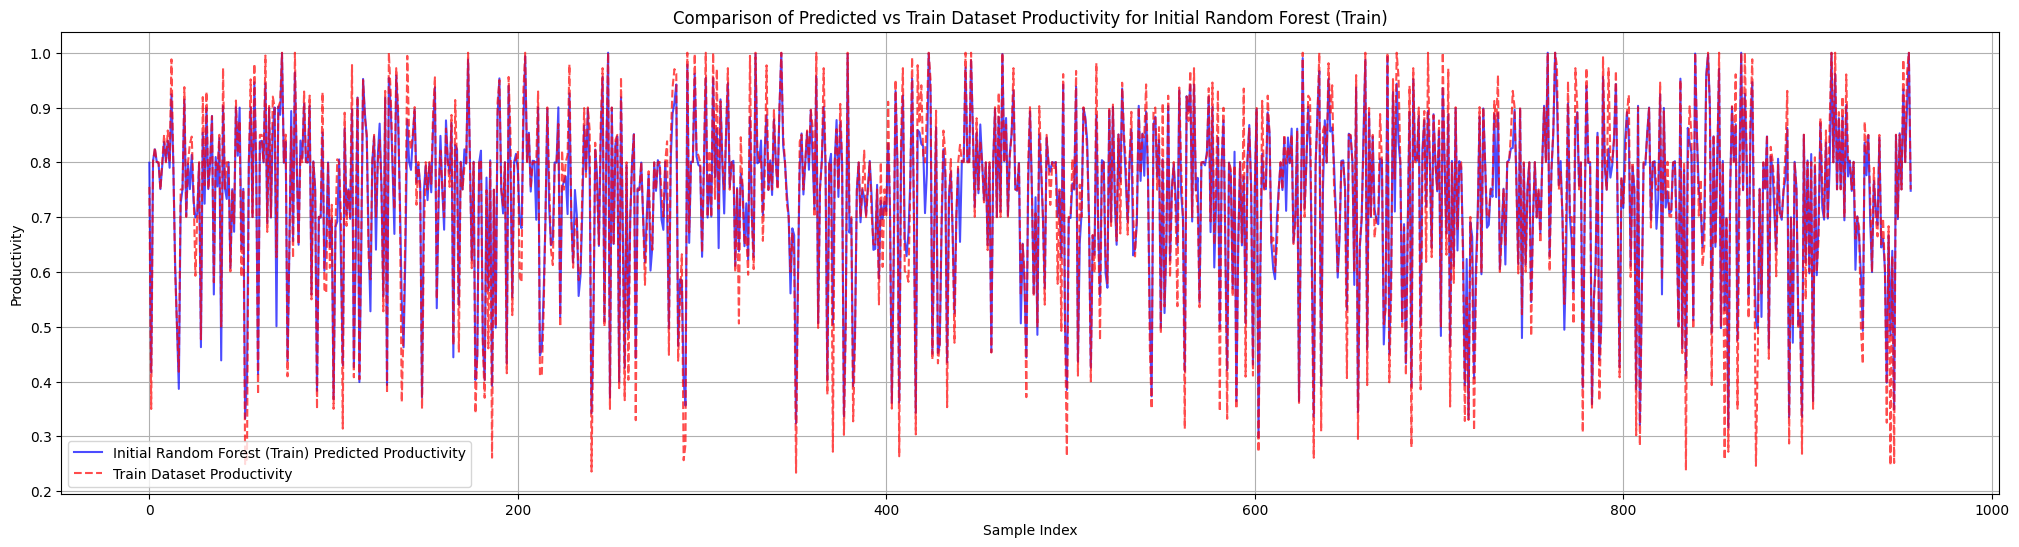

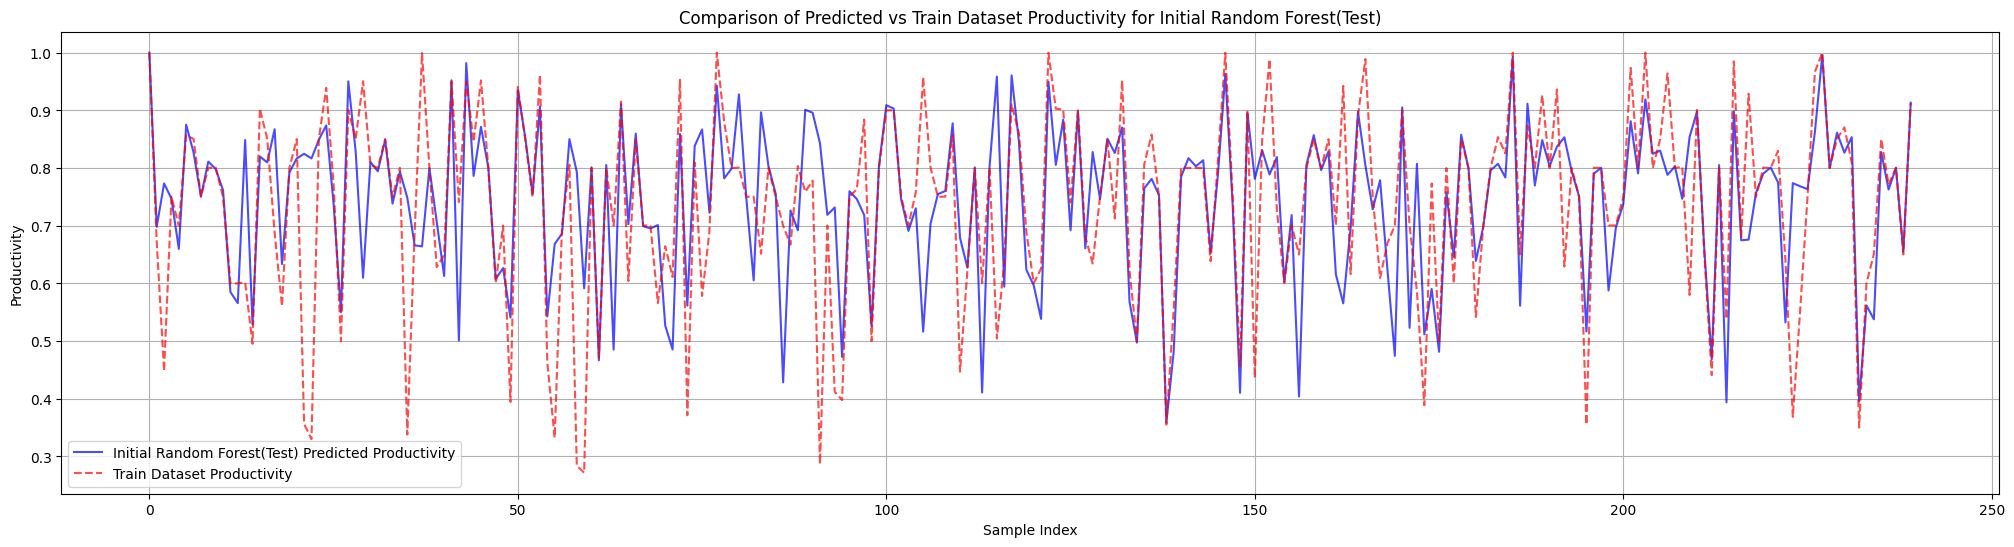

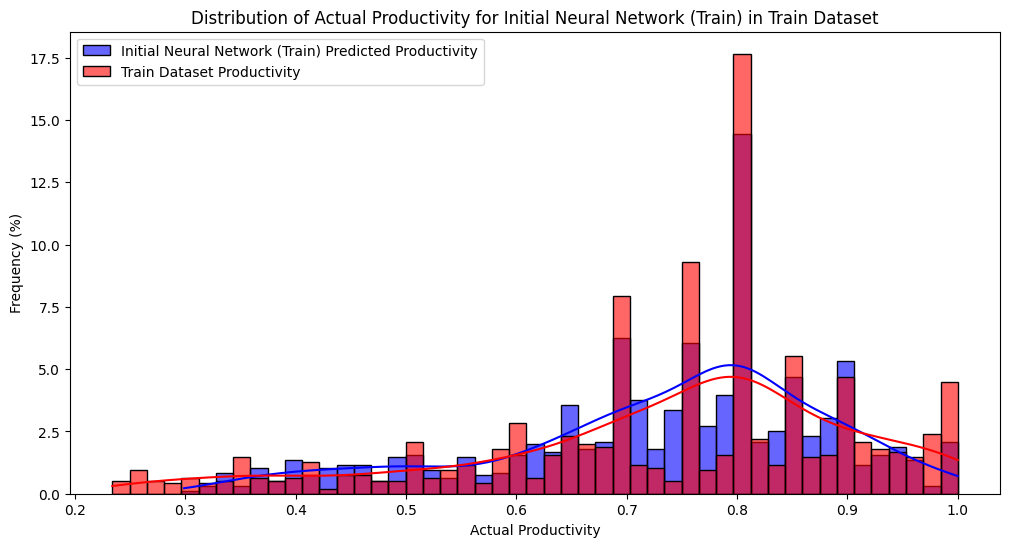

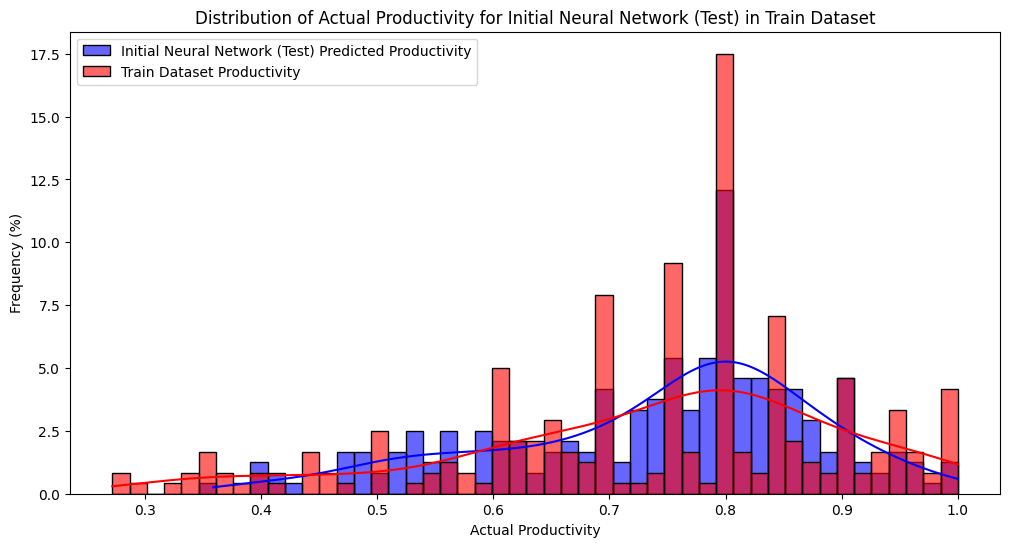

In [52]:
plotProductivityError(y_train, rf_train_pred, 'Initial Random Forest (Train)', False)
plotProductivityError(y_test, rf_test_pred, 'Initial Random Forest(Test)', False)

plotProductivityDistribution(y_train, rf_train_pred, 'Initial Neural Network (Train)', False)
plotProductivityDistribution(y_test, rf_test_pred, 'Initial Neural Network (Test)', False)

## VII-C. Neural Network

In [305]:
# Get the performance of the initial neural network model
getModelPerformance(initial_nn_model, 'Initial Neural Network', True)

Initial Neural Network Train MSE: 0.00765604684632986
Initial Neural Network Test MSE : 0.023414102891207895

Initial Neural Network Train RMSE: 0.08749883911418402
Initial Neural Network Test RMSE : 0.15301667520635748

Initial Neural Network Train MAE: 0.059153600656400594
Initial Neural Network Test MAE : 0.10458704682380317

Initial Neural Network Train R^2: 0.75090650141793
Initial Neural Network Test R^2 : 0.14045658132259198


Shown above are the final performance metrics of the Initial Neural Network after training.

For the train error metrics, it is not surprising that they are very low as the model is trained with it. Meanwhile for the test error metrics, given that it only used the default parameters for the MLP Regressor, its error metrics are already very low.

As the test RMSE and MAE are around 0.1~, it suggests that the the average error of the model's predicted value is +- 0.1~ from the test set's actual_productivity value.
However, the test R^2 error is 0.14, meaning that the model's predicted values only match around 14% of all the test set's actual_productivity values.
These values mean that the average error of the model to the test set is low, but it doesn't actually fit majority of the data trend well as a whole.

In [306]:
# Get the predicted productivity for the train and test dataset
nn_y_train_pred = initial_nn_model.predict(X_train_scaled)
nn_y_test_pred = initial_nn_model.predict(X_test_scaled)

# Scale the predicted values back to 0 and 1
nn_y_train_pred = np.clip(nn_y_train_pred, 0, 1)
nn_y_test_pred = np.clip(nn_y_test_pred, 0, 1)

In [307]:
# Show the first 20 instances of the predicted and actual productivity for the train and test dataset
print("Predicted - Train:\n")
print(showPredToActualTable(y_train, nn_y_train_pred, 20, False))
print("\n")
print("Predicted - Test:\n")
print(showPredToActualTable(y_test, nn_y_test_pred, 20, True))

Predicted - Train:

    Predicted Productivity  Train Dataset Productivity
0                 0.792260                    0.755167
1                 0.358117                    0.349951
2                 0.809731                    0.800393
3                 0.709560                    0.826803
4                 0.784405                    0.800594
5                 0.792360                    0.800333
6                 0.700585                    0.750520
7                 0.792278                    0.800125
8                 0.864599                    0.850313
9                 0.774100                    0.800129
10                0.764516                    0.858144
11                0.784753                    0.800580
12                0.889557                    0.987880
13                0.800222                    0.800344
14                0.630340                    0.600598
15                0.565146                    0.500035
16                0.494671                   

Shown above are a subset of the predictions for the train and test sets of the Initial Neural Network.
This way we can observe the raw predicted values and how they compare to the actual ones.

In general, one can see that many of the predicted values for the train set are pretty close to the actual values, corresponding to the low train error metrics. 
However, going into the test set, there are usually large variances between the values, also corresponding to the test error metrics.

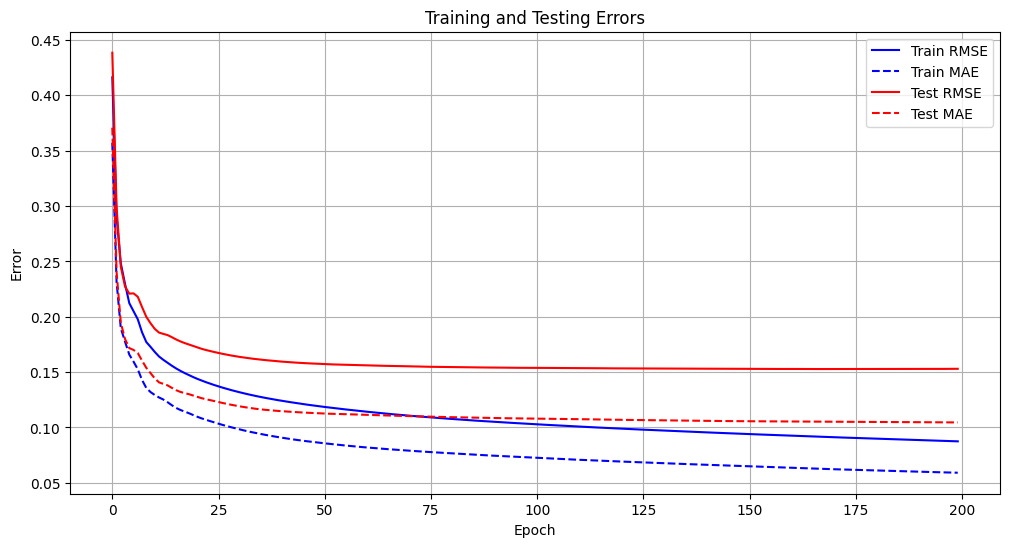

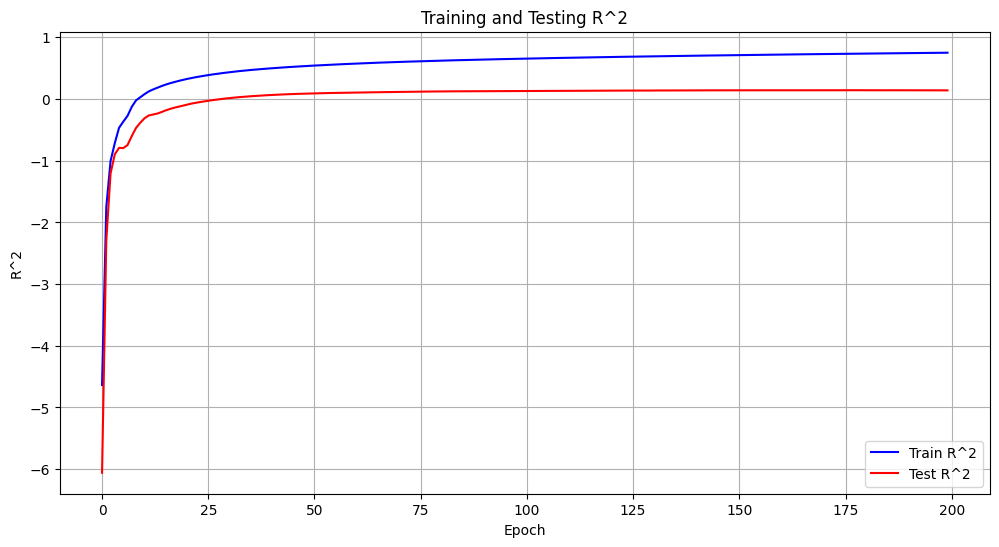

In [308]:
plotTrainingTestErrors(np.sqrt(nn_epoch_train_mse), nn_epoch_train_mae, np.sqrt(nn_epoch_test_mse), nn_epoch_test_mae)
plotTrainingTestR2(nn_epoch_r2, nn_epoch_test_r2)

Shown above are the test and train error metrics of the model as it is trained per epoch.

For the train and test RMSE and MAE, they both followed the standard graph for decreasing their error values, suggesting they trained properly. 
But it can be noted that there is a small local-minima for the test set at around the 5th epoch that the model was able to overcome.
It can also be seen that the train error metrics are significantly lower than the test ones, highlighting how the model fits more to the train set due to being trained with it.
The same trend can also be seen with the train and test R^2 scores, with the train being higher than the test.

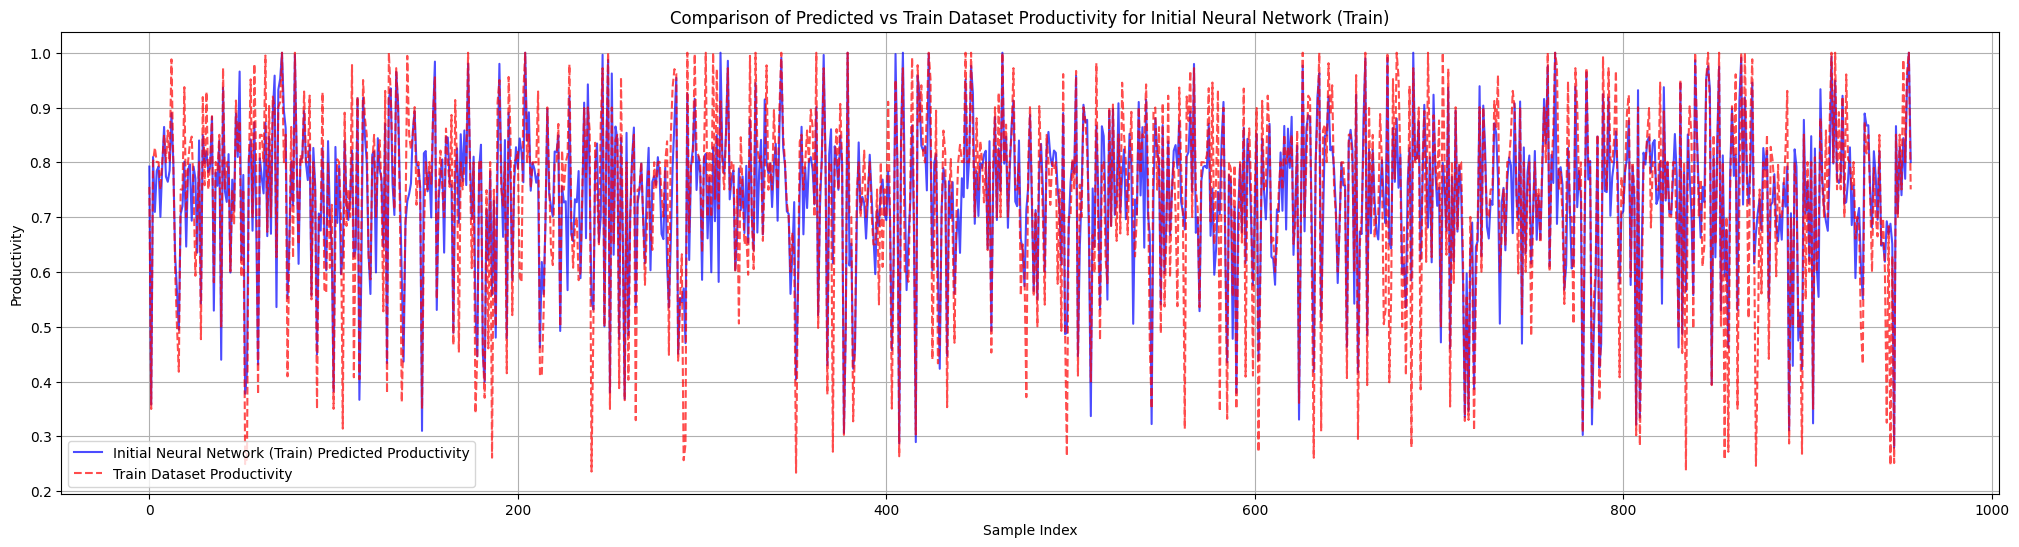

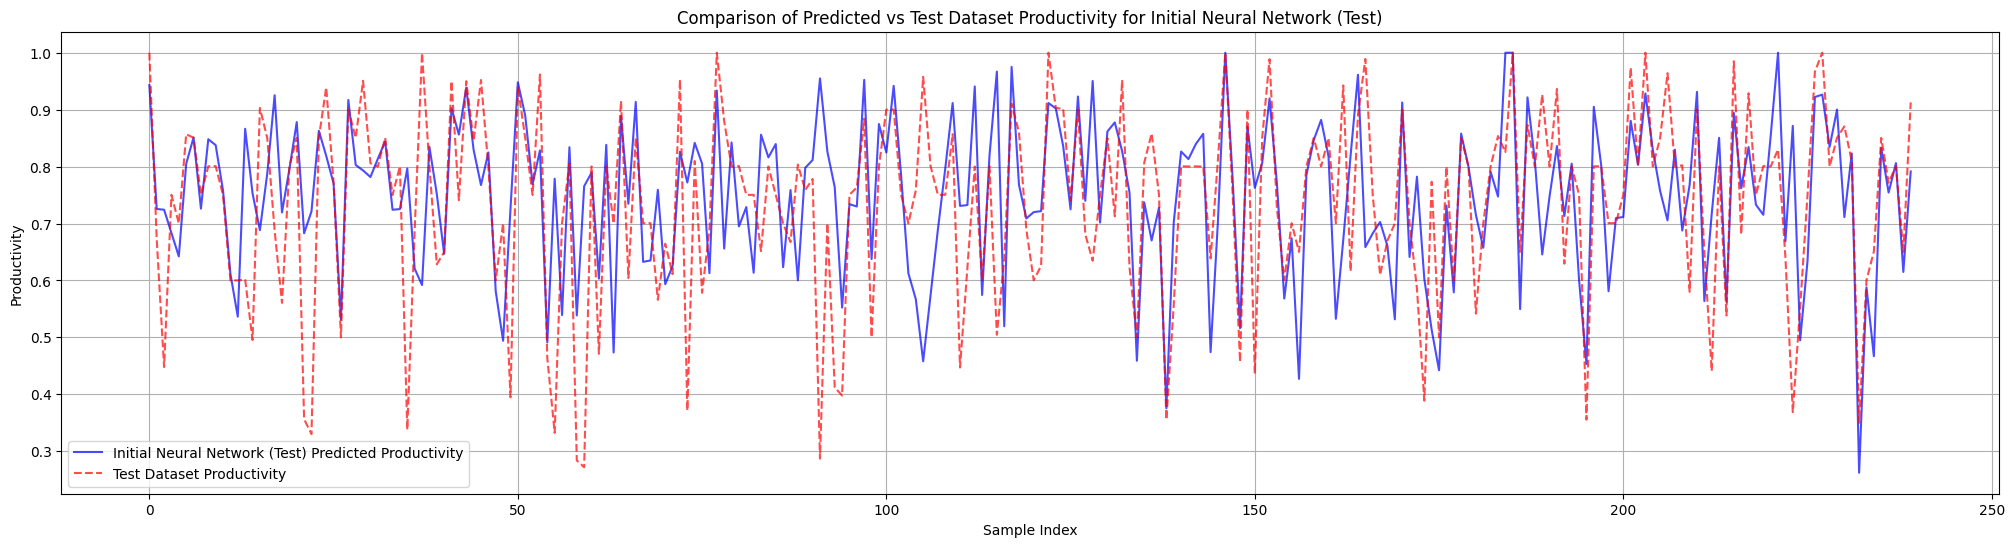

In [309]:
plotProductivityError(y_train, nn_y_train_pred, 'Initial Neural Network (Train)', False)
plotProductivityError(y_test, nn_y_test_pred, 'Initial Neural Network (Test)', True)

Shown above are the comparisons of the predicted and actual productivity values of the Initial Neural Network to the train and test set.

Looking into the train set's graph, it can be seen how the model's predictions try its best to match those of the train set's actual productivity values. 
It was able to capture a certain trend of the data, thus matching it well in many of the points (although, it is quite hard to see).
However, it struggles to match the large variance of the higher values.

Using the model for the test set, one can see how the values don't match as well in the test set's graph.
Although it was able to follow a general trend, there were many cases where it failed to follow all the points.
Another observation was how the model's predictions tend to be more conservative as compared to the predicted values, opting to give less-varied productivity values.
Similar to the train set's graph, this makes it struggle to match the large variance of higher values; this may explain why the R^2 score was pretty low.

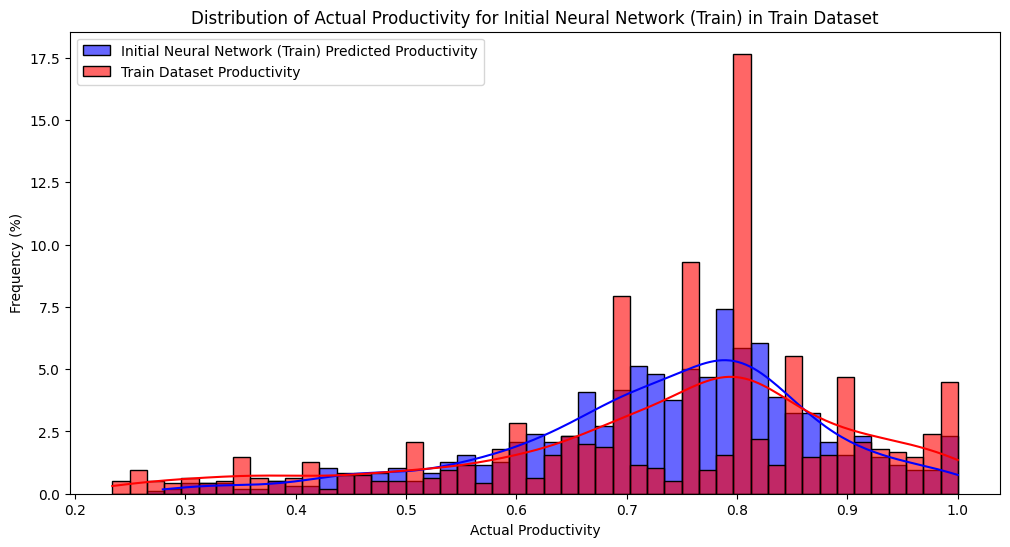

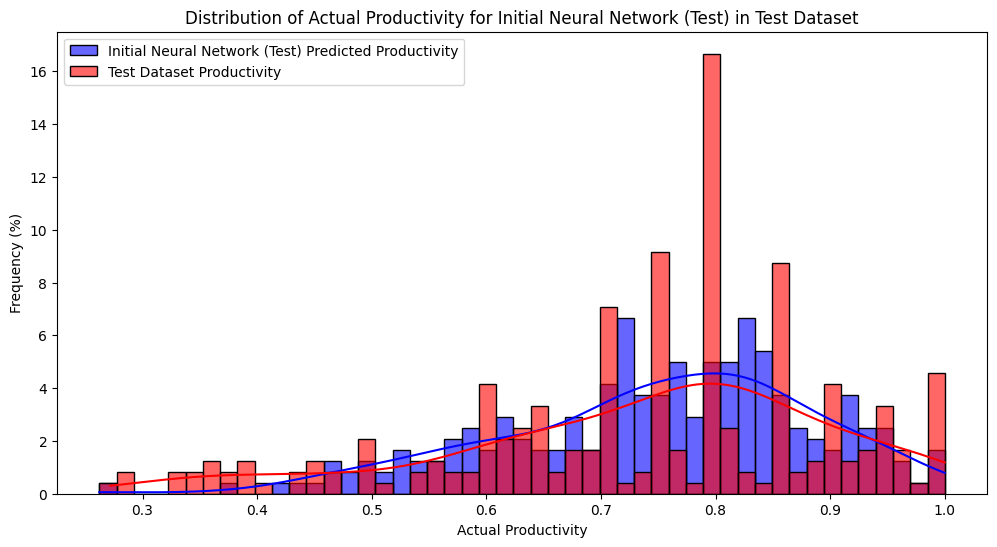

In [310]:
plotProductivityDistribution(y_train, nn_y_train_pred, 'Initial Neural Network (Train)', False)
plotProductivityDistribution(y_test, nn_y_test_pred, 'Initial Neural Network (Test)', True)

Shown above are the histograms of the predicted and actual productivity values of the Initial Neural Network to the train and test set.
This visualizes the same data in another perspective to see more trends on the data.

Right out the bat, one can see how the data for the actual productivity is generally skewed to certain productivity scores, as shown by the distribution of the histogram.
Meanwhile, the predictions given by the model are a lot more conservative and spreads out its values.
These confirm the suspicion on the previous analysis. 

This unbalanced skew makes it difficult for the model to consistently predict the actual values of the dataset, resulting to worse error metrics, despite the trend lines in the graph being relatively similar.

# VIII. Improving Model Performance

## VIII-A. Linear Regression

In order to improve the performance of the linear regression, we used 2 ways of tuning the hyperparameters:

    1. Linear Regression Pipeline with Grid Search
    2. Stochastic Gradient Descent with Grid Search

The reason for using 2 different approaches is to ensure that the obtained parameters are one of the most optimal for this data set. Since the time it takes to tune a linear regression model is relatively fast, it is feasible to explore multiple approaches to tune the model.

### Load Existing Models

Both models that are trained are stored in an external file, which is checked and loaded by the following cell. This is to avoid retraining the model, even if the models are trained relatively quickly.

In [ ]:
pipeline_lr_gscv_model = None
sgd_lr_gscv_model = None

try:
    pipeline_lr_gscv_model = joblib.load('pipeline_lr_gscv.pkl')
except:
    pipeline_lr_gscv_model = None

try: 
    sgd_lr_gscv_model = joblib.load('sgd_lr_gscv.pkl')
except:
    sgd_lr_gscv_model = None

    

### Linear Regression Pipeline using Grid Search

In [ ]:
if pipeline_lr_gscv_model is None:
    pipeline_lr_gscv = Pipeline([
        ('scaler', StandardScaler()),  # Standardize features
        ('linear_regression', LinearRegression())
    ])

In [ ]:
if pipeline_lr_gscv_model is None:
    lr_hyperparameters = {
        'linear_regression__fit_intercept': [True, False],  # Whether to include the intercept
    }

In [ ]:
if pipeline_lr_gscv_model is None:
    pipeline_lr_gscv_model = GridSearchCV(
        pipeline_lr_gscv,
        lr_hyperparameters,
        cv=5,
        verbose=10,
        n_jobs=-1
    )

In [ ]:
pipeline_lr_gscv_model.fit(X_train, y_train)

In [ ]:
joblib.dump(pipeline_lr_gscv_model, 'pipeline_lr_gscv.pkl')

In [ ]:
pipeline_lr_gscv_model.best_estimator_

In [ ]:
getModelPerformance(pipeline_lr_gscv_model.best_estimator_, 'Pipeline Linear Regression', False)

### Stochastic Gradient Descent with Grid Search

For SGD with Grid Search, we used the same hyperparameter options as the one used in SGD with Randomized Search

In [ ]:
sgd_lr_gscv_hyperparameters = None

if sgd_lr_gscv_model is None:
    sgd_lr_gscv_hyperparameters = {
        'fit_intercept': [True, False],
        'max_iter': [200, 400, 600, 800, 1000],
        'learning_rate': ['adaptive', 'constant', 'invscaling'],
        'eta0': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
        'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1]
    }

In [ ]:
if sgd_lr_gscv_model is None:
    sgd_lr_gscv_model = SGDRegressor(random_state=random_seed)
    sgd_lr_gscv_model = RandomizedSearchCV(sgd_lr_gscv_model, sgd_lr_gscv_hyperparameters, n_iter=135, cv=50, random_state=random_seed, n_jobs=-1)

In [ ]:
sgd_lr_gscv_model.fit(X_train_scaled, y_train)

In [ ]:
joblib.dump(sgd_lr_gscv_model, 'sgd_lr_gscv.pkl')

In [ ]:
getModelPerformance(sgd_lr_gscv_model.best_estimator_, 'SGD with Grid Search', True)

## VIII-B. Random Forest

An issue that random forest models face is the more minimal effect of tuning compared to other models such as Support Vector Machines or Neural Networks, as something like n_estimators is dissimilar from other hyperparameters as it is almost always strictly better to go for higher values but only up to the point that tradeoff between performance and training time are not too great; while one of the hyperparameters that generally seem to have a greater effect is the number of random features considered at each split which in our case would be the max_features parameter(Probst et al., 2019). 

They've also suggested the usage of grid search, random search, and other tuning strategies to find optimal values for the hyper parameters, in our case we plan to implement random search.

In [39]:
# Try to load the model
tuned_rf_model = None
try:
    tuned_rf_model = joblib.load('rf_rscv.pkl')
except:
    tuned_rf_model = None

In [46]:
initial_rf_regressor = RandomForestRegressor(random_state=random_seed) #8, 12

Considering that the tradeoff for n_estimators is linear, its value will be continually increased until there has been a noticeable tradeoff on time, while for max depth the range of values will begin from 1 to 100 with no particular study supporting the value range, however it should suffice considering the number of features in the dataset. Another parameter that is important to tune is the max_feature parameter as it controls the number of randomly selected features when splitting, and actually allowing the algorithm to make trees with less correlation leading to less overfitting.

In [85]:
rf_hyperparameters = [
        {
            'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
            'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
            'max_depth': list(range(1, 100)),      
            'min_samples_leaf': list(range(1, 5)),
            'max_features': list(range(1, 24)) + ["sqrt", "log2"],
            'bootstrap': [True, False]
        }
    ]

In [87]:
tuned_rf_model = RandomizedSearchCV(initial_rf_regressor, rf_hyperparameters, n_iter=10, cv=5, n_jobs=-1, random_state=random_seed)
tuned_rf_model.fit(X_train, y_train)
joblib.dump(tuned_rf_model, 'rf_rscv.pkl')

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=69),
                   n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'criterion': ['squared_error',
                                                       'absolute_error',
                                                       'friedman_mse',
                                                       'poisson'],
                                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                       9, 10, 11, 12, 13, 14,
                                                       15, 16, 17, 18, 19, 20,
                                                       21, 22, 23, 24, 25, 26,
                                                       27, 28, 29, 30, ...],
                                         'max_features': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9, 10, 11, 12, 13,
                                                          14, 15, 16, 17, 18,
                                                          19, 20, 21, 22, 23,
                                                          'sqrt', 'log2'],
                                         'min_samples_leaf': [1, 2, 3, 4],
                                         'n_estimators': [100, 200, 300, 400,
                                                          500, 600, 700, 800,
                                                          900, 1000]}],
                   random_state=69)

In [40]:
if tuned_rf_model is None:
    tuned_rf_model = RandomizedSearchCV(initial_rf_regressor, rf_hyperparameters, n_iter=10, cv=5, n_jobs=-1, random_state=random_seed)
    tuned_rf_model.fit(X_train, y_train)
    joblib.dump(tuned_rf_model, 'rf_rscv.pkl')

In [88]:
pd.DataFrame(tuned_rf_model.cv_results_).sort_values('rank_test_score', ascending=True).head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2       3.105556      0.451511         0.080209        0.028402   
7       3.777010      0.231464         0.059382        0.015200   
8       0.780797      0.066280         0.019283        0.002756   
6       1.262535      0.151915         0.021605        0.005843   
9       5.634751      0.611013         0.016614        0.002692   
3      18.293643      1.270126         0.029014        0.016180   
0       1.952288      0.171349         0.022273        0.003424   
4       4.207383      0.396569         0.042379        0.011793   
1      44.506998      1.466003         0.034094        0.009310   
5       1.477808      0.182716         0.035081        0.003024   

   param_n_estimators  param_min_samples_leaf  param_max_features  \
2                 900                       2                   5   
7                 800                       2                  13   
8                 300                       4                   7   
6                 300                       4                  10   
9                 300                       2                   7   
3                 400                       3                   8   
0                 300                       3                  20   
4                 500                       1                  19   
1                 400                       1                  20   
5                 700                       1                   8   

   param_max_depth param_criterion  param_bootstrap  \
2               72    friedman_mse            False   
7               14         poisson             True   
8               82   squared_error            False   
6               42         poisson            False   
9               24  absolute_error             True   
3               55  absolute_error            False   
0               62   squared_error            False   
4               45   squared_error            False   
1               24  absolute_error            False   
5                3         poisson             True   

                                              params  split0_test_score  \
2  {'n_estimators': 900, 'min_samples_leaf': 2, '...           0.630504   
7  {'n_estimators': 800, 'min_samples_leaf': 2, '...           0.622008   
8  {'n_estimators': 300, 'min_samples_leaf': 4, '...           0.629840   
6  {'n_estimators': 300, 'min_samples_leaf': 4, '...           0.614562   
9  {'n_estimators': 300, 'min_samples_leaf': 2, '...           0.618042   
3  {'n_estimators': 400, 'min_samples_leaf': 3, '...           0.624785   
0  {'n_estimators': 300, 'min_samples_leaf': 3, '...           0.618351   
4  {'n_estimators': 500, 'min_samples_leaf': 1, '...           0.597566   
1  {'n_estimators': 400, 'min_samples_leaf': 1, '...           0.479185   
5  {'n_estimators': 700, 'min_samples_leaf': 1, '...           0.399035   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
2           0.589316           0.553769           0.473905           0.629937   
7           0.580715           0.566618           0.464292           0.643373   
8           0.555974           0.555478           0.469374           0.646530   
6           0.559612           0.545721           0.467972           0.646008   
9           0.546209           0.571192           0.473115           0.646865   
3           0.538522           0.570375           0.467026           0.631716   
0           0.558602           0.514130           0.477083           0.547273   
4           0.591965           0.484461           0.416611           0.442982   
1           0.621595           0.445552           0.453702           0.370155   
5           0.374963           0.370012           0.289748           0.420723   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
2           0.505398           0.610340           0.551950           0.616116   
7           0.51132

In [89]:
tuned_rf_model.best_params_

{'n_estimators': 900,
 'min_samples_leaf': 2,
 'max_features': 5,
 'max_depth': 72,
 'criterion': 'friedman_mse',
 'bootstrap': False}

From what can be inferred in the performance of the top 10 parameters and the chosen value for the best parameters, models that have actually set the value for max_features leading to the random sampling of features have performed better than the models that use all features like normal decision tress.

Most of the high-performing parameters have n_estimators greater than the default value of 100 supporting the idea of convergence becoming better as the number of decision trees increase.

One thing to note is that although there train score has decreased a fair bit, the model has been able to generalize better and increase its performance on the test set albeit with a price.

In [94]:
getModelPerformance(tuned_rf_model, 'Initial Random Forest Model', False)

Initial Random Forest Model Train MSE: 0.0031875799435854705
Initial Random Forest Model Test MSE : 0.017678887466253505

Initial Random Forest Model Train RMSE: 0.05645865694103492
Initial Random Forest Model Test RMSE : 0.1329619775208443

Initial Random Forest Model Train MAE: 0.03341580356934813
Initial Random Forest Model Test MAE : 0.08082408395885696

Initial Random Forest Model Train R^2: 0.8962904151326646
Initial Random Forest Model Test R^2 : 0.35099920583065347


## VIII-C. Neural Network

After training the Initial Neural Network model and evaluating its performance, now it is time to create an improved model by using hyperparameter tuning.

As the hyperparameter tuning and training of Neural Networks takes a while to complete (40 minutes in this case), it was more economical to export and save the model for later use to prevent needing to retrain a new model every time the notebook is run.

The code below checks whether there already exists a Tuned Neural Network in the folder to use for testing and evaluation.
If there is already a saved model, it will not run the hyperparameter tuning anymore and will use the existing model.
Otherwise, it will train and tune a model, then save it into the folder.

In [317]:
# Try to load the model
tuned_nn_model = None
try:
    tuned_nn_model = joblib.load('nn_rscv.pkl')
except:
    tuned_nn_model = None

Helper function to get all a list of all possible combinations of hidden layers given the minimum layers, maximum layers, and neuron options. 

In [318]:
# Get all possible hidden layer sizes combinations
def get_hidden_layer_sizes(min_layers, max_layers, neuron_options):
    hidden_layer_sizes = []
    for num_layers in range(min_layers, max_layers + 1):
        for combination in itertools.product(neuron_options, repeat=num_layers):
            hidden_layer_sizes.append(combination)
    return hidden_layer_sizes

For the hyperparameter options, most of them were chosen with the basis being that they are the standard and most used.
This goes for the Initial Learning Rate and Regularization Constant being decimals of 1.
As for the max iterations, several standard values were included for the model to select the best number of iterations while preventing under and over fitting.

Meanwhile, as for the optimizer and activation function, they can be selected from those that are available within the MLPRegressor model.
In general, the most performant of the available options were selected, such as selecting ADAM over Stochastic Gradient Descent, TanH and ReLU over Logistic, and Adaptive over Constant learning rate change.

Lastly, the most significant of the hyperparameters is the number of hidden layers and neurons per layer. 
Although there is no definite answer for these parameters, a good starting point for simple problems is to have 1-2 hidden layers with 2/3 of the input size number for the neurons per layer (An, 2022).
However, the current problem is very intricate and complex with its values, so the simple case may not very feasible.
Additionally, as Python itself can output Memory Errors if a list is too big, certain values had to be limited for the model.
In the end, after multiple tunning iterations, it was found that 10 hidden layers with a combination of 50, 100, 250, and 500 neurons were the most performant in the hyperparameter tuning.
This was chosen to highlight the complexity of the features by adding multiple hidden layers, while also distributing neuron sizes to balance out the neurons for each layer.

Hyperparameter Tunning Options:
- Neurons and hidden layers: 10 layers with a combination of [50, 100, 250, 500] neurons
- Solver and Optimizer: ADAM
- Activation Function: [TanH, ReLU]
- Max Iterations: [200, 400, 600, 800, 1000]
- Initial Learning Rate: [0.1, 0.01, 0.001, 0.0001]
- Learning Rate Change: adaptive
- Regularization Constant: [0.0001, 0.001, 0.01, 0.1]
- Random Sate: 69

In [319]:
nn_hyperparameters = None

# Define hyperparameters
if tuned_nn_model is None:
    
    # Define hidden layer sizes
    neuron_options = [50, 100, 250, 500]
    min_layers = 10
    max_layers = 10
    
    nn_hyperparameters = [
        {
            'hidden_layer_sizes': get_hidden_layer_sizes(min_layers, max_layers, neuron_options),
            'solver': ['adam'],
            'activation': ['tanh', 'relu'],
            'max_iter': [200, 400, 600, 800, 1000],
            'learning_rate_init': [0.1, 0.01, 0.001, 0.0001],
            'learning_rate': ['adaptive'],
            'alpha': [0.0001, 0.001, 0.01, 0.1]
        }
    ]

For the actual hyperparameter tuning technique, the RandomizedSearchCV technique was used.

RandomizedSearchCV is a method for tuning the hyperparameters of a model by randomly selecting values rather than using a fixed grid of parameters, like GridSearchCV. 
In each iteration, it tests a different set of hyperparameters and records how well the model performs by using Cross-Validation to separate the train set into train and validation and evaluate them. 
After multiple iterations, it identifies the combination that yields the best results. 
This random selection approach reduces unnecessary calculations compared to testing every possible combination systematically and can generally yield similar results (GeeksforGeeks, 2023).

To tune the hyperparameters faster, the n_jobs parameter was set to -1, which means that the model will use all available CPU cores to tune the model concurrently, thus saving time.
The n_iter parameter was also set to 100. 
Although this increases training time, it gives the RandomizedSearchCV more of a chance to stumble across a more accurate combination of hyperparameters.

In [320]:
# Randomized Search to find the best hyperparameters and Train the model
if tuned_nn_model is None:
    
    tuned_nn_regressor = MLPRegressor(random_state=random_seed)
    tuned_nn_model = RandomizedSearchCV(tuned_nn_regressor, nn_hyperparameters, n_iter=100, cv=5, n_jobs=-1, random_state=random_seed)
    tuned_nn_model.fit(X_train_scaled, y_train)
    joblib.dump(tuned_nn_model, 'nn_rscv.pkl')

Display the top 10 best performing hyperparameter combinations.

In [321]:
pd.DataFrame(tuned_nn_model.cv_results_).sort_values('rank_test_score', ascending=True).head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
65      50.874824     12.171838         0.072536        0.018671   
71      66.552773     13.712595         0.056149        0.011298   
87      63.396710     21.005838         0.058688        0.011962   
91      48.098921     24.029966         0.062506        0.019237   
83      59.412676     13.254108         0.043968        0.006390   
85     456.017092     15.104468         0.023664        0.001351   
68      12.221631      1.525974         0.023973        0.005933   
49      51.176488      7.012787         0.016963        0.004049   
1       20.564206      3.882040         0.040253        0.004215   
14     137.669678     19.493034         0.038099        0.011320   

    param_max_iter  param_learning_rate_init param_learning_rate  \
65            1000                    0.0001            adaptive   
71             600                    0.0001            adaptive   
87             400                    0.0001            adaptive   
91            1000                    0.0010            adaptive   
83             400                    0.0010            adaptive   
85             600                    0.0010            adaptive   
68            1000                    0.0001            adaptive   
49             600                    0.0010            adaptive   
1             1000                    0.0001            adaptive   
14             600                    0.0010            adaptive   

                             param_hidden_layer_sizes  param_alpha  \
65  (500, 250, 250, 100, 500, 500, 250, 500, 250, 50)      0.00001   
71  (250, 500, 100, 500, 500, 50, 100, 250, 100, 250)      0.00010   
87   (250, 500, 50, 250, 500, 500, 100, 250, 500, 50)      0.00010   
91    (500, 100, 500, 50, 250, 250, 500, 500, 50, 50)      0.00100   
83     (500, 250, 50, 50, 50, 100, 500, 500, 100, 50)      0.00001   
85    (500, 500, 500, 500, 50, 100, 50, 100, 100, 50)      0.10000   
68     (100, 500, 50, 100, 100, 50, 50, 500, 250, 50)      0.00001   
49   (100, 100, 50, 50, 100, 500, 100, 500, 100, 100)      0.10000   
1   (100, 500, 50, 100, 100, 500, 500, 100, 100, 250)      0.00001   
14  (500, 250, 250, 250, 100, 100, 500, 500, 50, 250)      0.10000   

   param_activation                                             params  \
65             tanh  {'max_iter': 1000, 'learning_rate_init': 0.000...   
71             tanh  {'max_iter': 600, 'learning_rate_init': 0.0001...   
87             tanh  {'max_iter': 400, 'learning_rate_init': 0.0001...   
91             tanh  {'max_iter': 1000, 'learning_rate_init': 0.001...   
83             tanh  {'max_iter': 400, 'learning_rate_init': 0.001,...   
85             tanh  {'max_iter': 600, 'learning_rate_init': 0.001,...   
68             tanh  {'max_iter': 1000, 'learning_rate_init': 0.000...   
49             relu  {'max_iter': 600, 'learning_rate_init': 0.001,...   
1              tanh  {'max_iter': 1000, 'learning_rate_init': 0.000...   
14             relu  {'max_iter': 600, 'learning_rate_init': 0.001,...   

    split0_test_score  split1_test_score  split2_test_score  \
65           0.449909           0.455699           0.426667   
71           0.376528           0.455842           0.369465   
87           0.394037           0.428909           0.429368   
91           0.466507           0.382505           0.412305   
83           0.423165           0.445130           0.332141   
85           0.291472           0.421342           0.352104   
68           0.439940           0.329732           0.251956   
49           0.351698           0.298278           0.265157   
1            0.400718           0.339141           0.277270   
14           0.395188           0.369232           0.246546   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
65           0.355193           0.456205         0.428735        0.038321   
71           0.403184           0.461509         0.413306        0.03875

Out of the top performing hyperparameter configurations, there is a clear gap between the mean test score performance of the top 5 combinations and the rest, with all of them being almost 40% accurate to the validation sets.
Of the top 5 combinations, there is a trend for them to have smaller learning rates and regularization constants.
This suggest that they might overfit to the training data due to training with them for many iterations and having little to combat high variance.
This may also explain why they might have achieved higher mean test scores.

Below are the best hyperparameters chosen after running the hyperparameter tunning.

Most Performant Hyperparameter Values:
- Neurons and hidden layers: 10 layers with [500, 250, 250, 100, 500, 500, 250, 500, 250, 50] neurons
- Solver and Optimizer: ADAM
- Activation Function: TanH
- Max Iterations: 1000
- Initial Learning Rate: 0.0001
- Learning Rate Change: adaptive
- Regularization Constant: 0.0001
- Random Sate: 69

In [322]:
# Get the best hyperparameters
tuned_nn_model.best_params_

{'max_iter': 1000,
 'learning_rate_init': 0.0001,
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (500, 250, 250, 100, 500, 500, 250, 500, 250, 50),
 'alpha': 1e-05,
 'activation': 'tanh'}

Based on the most performant hyperparameters, it can be implied that the Tuned Neural Network took a slower approach to its training; as highlighted by its very low initial learning rate and very high max iterations.
In most cases, one may think that there is a high chance that the model would overfit to the training set, as it was fitted to it through many iterations and that its regularization constant is very low.
Despite this, it still learned the trend of the data and was able to get pretty good predictions to the productivity values (to which will be discussed later).

After the hyperparameters have been tuned and the model has been trained, display its error metrics for both train and test sets to show its performance. The analysis for the errors will be featured in the Model Performance Summary section.

In [323]:
# Get the performance of the model
getModelPerformance(tuned_nn_model, 'Tuned Neural Network', True)

Tuned Neural Network Train MSE: 0.013626707850113981
Tuned Neural Network Test MSE : 0.017993082392974084

Tuned Neural Network Train RMSE: 0.11673349069617503
Tuned Neural Network Test RMSE : 0.1341382957733327

Tuned Neural Network Train MAE: 0.0807844327510955
Tuned Neural Network Test MAE : 0.08939847596051743

Tuned Neural Network Train R^2: 0.5566479149526348
Tuned Neural Network Test R^2 : 0.33946495304722035


# IX. Model Performance Summary

## IX-A. Linear Regression

In [ ]:
getModelPerformance(initial_linear_regression, 'Initial Linear Regression', False)
print("-----------------------------")
getModelPerformance(pipeline_lr_gscv_model.best_estimator_, 'Pipeline Linear Regression', False)
getModelPerformance(sgd_lr_gscv_model.best_estimator_, 'SGD with Grid Search', True)

In [ ]:
pipeline_lr_train_pred = pipeline_lr_gscv_model.predict(X_train)
pipeline_lr_test_pred = pipeline_lr_gscv_model.predict(X_test)

print("Pipeline Linear Regression")
print("Predicted - Train:\n")
print(showPredToActualTable(y_train, pipeline_lr_train_pred, 20, False))
print("\n")
print("Predicted - Test:\n")
print(showPredToActualTable(y_test, pipeline_lr_test_pred, 20, False))
print("-----------------------------")

In [ ]:
sgd_lr_gscv_train_pred = sgd_lr_gscv_model.predict(X_train)
sgd_lr_gscv_test_pred = sgd_lr_gscv_model.predict(X_test)

print("SGD - Grid Search")
print("Predicted - Train:\n")
print(showPredToActualTable(y_train, sgd_lr_gscv_train_pred, 20, False))
print("\n")
print("Predicted - Test:\n")
print(showPredToActualTable(y_test, sgd_lr_gscv_test_pred, 20, False))
print("-----------------------------")

In [ ]:
plotProductivityError(y_train, pipeline_lr_train_pred, 'Pipeline Linear Regression (Train)', False)
plotProductivityError(y_test, pipeline_lr_test_pred, 'Pipeline Linear Regression (Test)', False)

plotProductivityDistribution(y_train, pipeline_lr_train_pred, 'Pipeline Linear Regression (Train)', False)
plotProductivityDistribution(y_test, pipeline_lr_test_pred, 'Pipeline Linear Regression (Test)', False)

In [ ]:
plotProductivityError(y_train, sgd_lr_gscv_train_pred, 'SGD with Grid Search (Train)', False)
plotProductivityError(y_test, sgd_lr_gscv_test_pred, 'SGD with Grid Search (Test)', False)

plotProductivityDistribution(y_train, sgd_lr_gscv_train_pred, 'SGD with Grid Search (Train)', False)
plotProductivityDistribution(y_test, sgd_lr_gscv_test_pred,  'SGD with Grid Search (Test)', False)

## IX-B. Random Forest

In [76]:
getModelPerformance(tuned_rf_model, 'Initial Random Forest', False)

Initial Random Forest Train MSE: 0.0031875799435854705
Initial Random Forest Test MSE : 0.017678887466253505

Initial Random Forest Train RMSE: 0.05645865694103492
Initial Random Forest Test RMSE : 0.1329619775208443

Initial Random Forest Train MAE: 0.03341580356934813
Initial Random Forest Test MAE : 0.08082408395885696

Initial Random Forest Train R^2: 0.8962904151326646
Initial Random Forest Test R^2 : 0.35099920583065347


In [83]:
rf_train_pred = tuned_rf_model.predict(X_train)
rf_test_pred = tuned_rf_model.predict(X_test)

print("Predicted - Train:\n")
print(showPredToActualTable(y_train, rf_train_pred, 20, False))
print("\n")
print("Predicted - Test:\n")
print(showPredToActualTable(y_test, rf_test_pred, 20, False))

Predicted - Train:

    Predicted Productivity  Train Dataset Productivity
0                 0.799075                    0.755167
1                 0.443986                    0.349951
2                 0.810715                    0.800393
3                 0.803420                    0.826803
4                 0.800443                    0.800594
5                 0.797962                    0.800333
6                 0.745899                    0.750520
7                 0.797029                    0.800125
8                 0.837599                    0.850313
9                 0.801721                    0.800129
10                0.814542                    0.858144
11                0.787176                    0.800580
12                0.899703                    0.987880
13                0.799974                    0.800344
14                0.601872                    0.600598
15                0.504577                    0.500035
16                0.408230                   

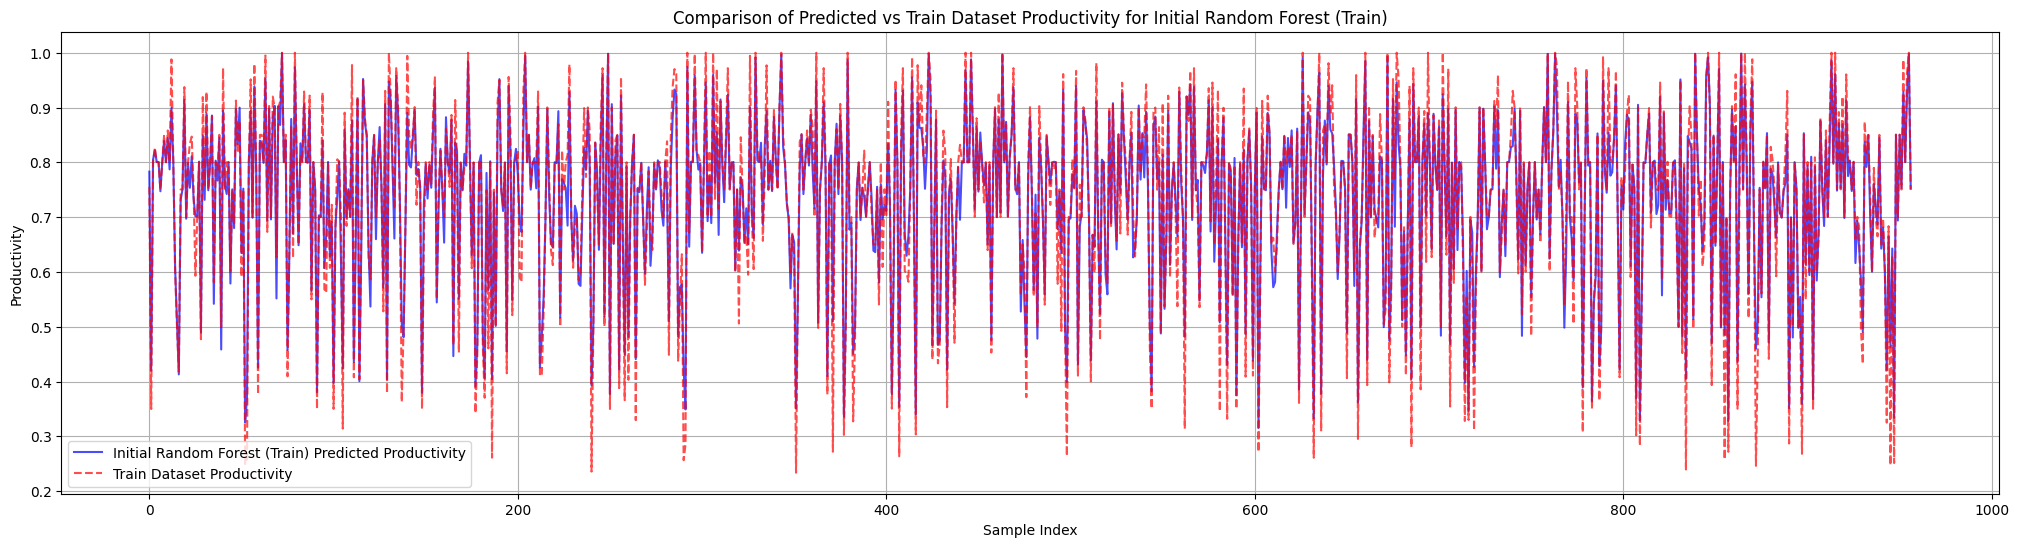

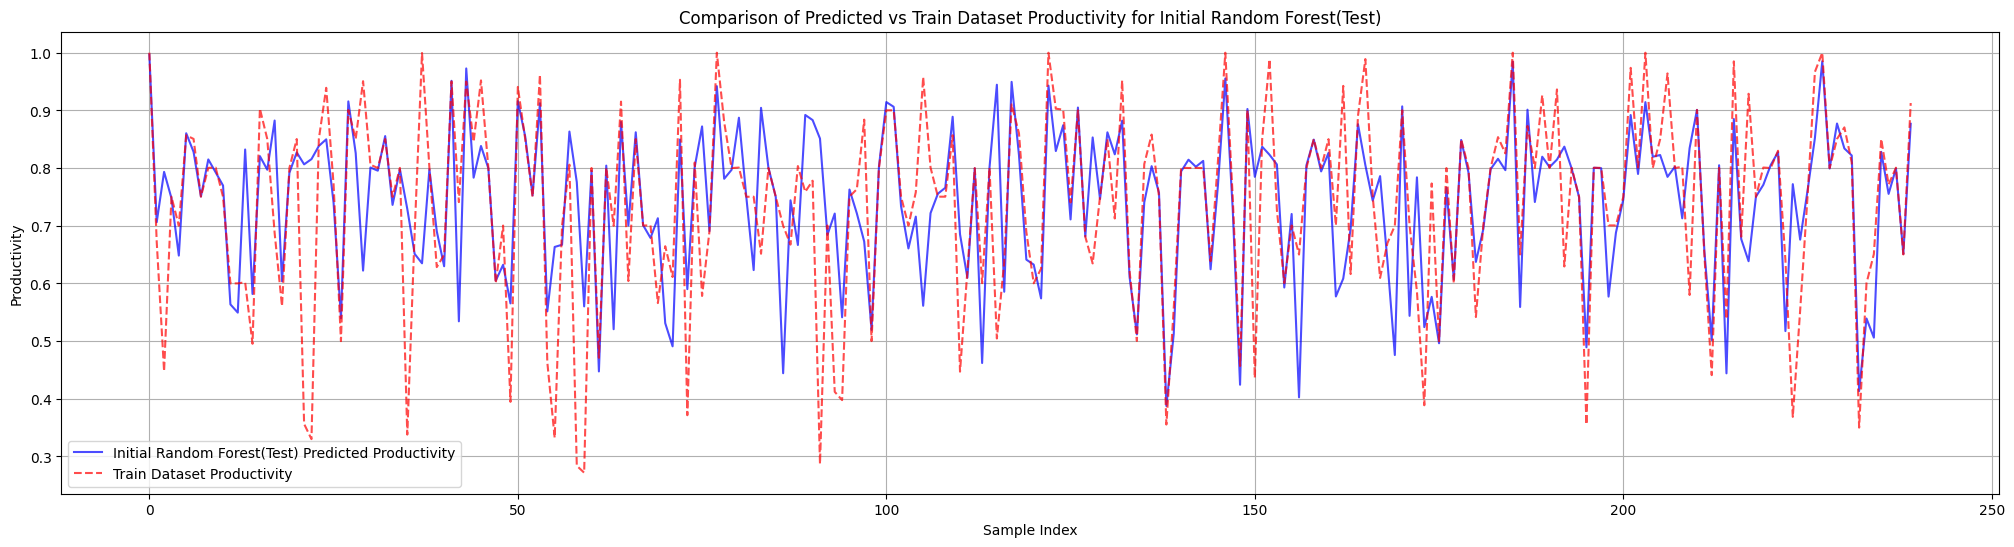

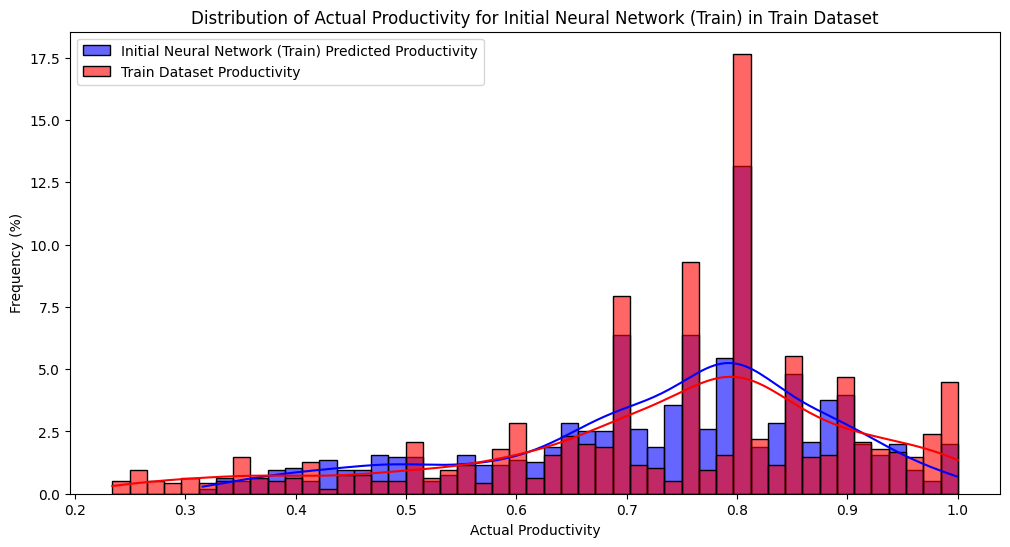

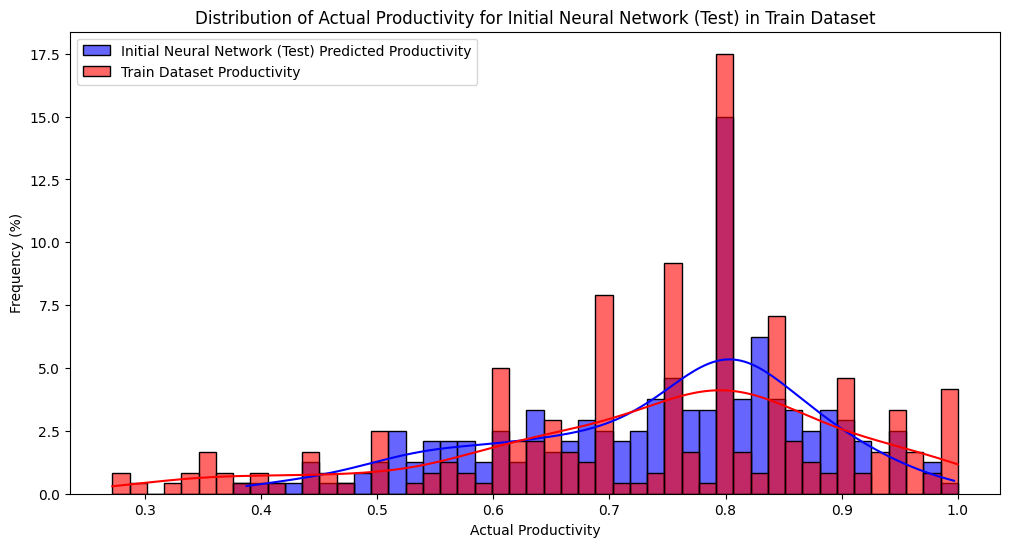

In [326]:
plotProductivityError(y_train, rf_train_pred, 'Initial Random Forest (Train)', False)
plotProductivityError(y_test, rf_test_pred, 'Initial Random Forest(Test)', False)

plotProductivityDistribution(y_train, rf_train_pred, 'Initial Neural Network (Train)', False)
plotProductivityDistribution(y_test, rf_test_pred, 'Initial Neural Network (Test)', False)

## IX-C. Neural Network

In [327]:
# Get the performance of the initial and tuned neural network models
getModelPerformance(initial_nn_model, 'Initial Neural Network', True)
print('\n--------------------------------------------------\n')
getModelPerformance(tuned_nn_model, 'Tuned Neural Network', True)

Initial Neural Network Train MSE: 0.00765604684632986
Initial Neural Network Test MSE : 0.023414102891207895

Initial Neural Network Train RMSE: 0.08749883911418402
Initial Neural Network Test RMSE : 0.15301667520635748

Initial Neural Network Train MAE: 0.059153600656400594
Initial Neural Network Test MAE : 0.10458704682380317

Initial Neural Network Train R^2: 0.75090650141793
Initial Neural Network Test R^2 : 0.14045658132259198

--------------------------------------------------

Tuned Neural Network Train MSE: 0.013626707850113981
Tuned Neural Network Test MSE : 0.017993082392974084

Tuned Neural Network Train RMSE: 0.11673349069617503
Tuned Neural Network Test RMSE : 0.1341382957733327

Tuned Neural Network Train MAE: 0.0807844327510955
Tuned Neural Network Test MAE : 0.08939847596051743

Tuned Neural Network Train R^2: 0.5566479149526348
Tuned Neural Network Test R^2 : 0.33946495304722035


Shown above are the final performance metrics of both the Initial and Tuned Neural Networks after training.

Comparing the performance of the Initial and Tuned Neural Networks, it can be noted that the Initial Model's predictions fits the train set a lot more than the Tuned Model. 
This may be because the RandomizedSearch using Cross-Validation, training the model with only a subset of the train set and using the rest for evaluation.
This lets the Tuned Model not overfit to the train set, thus why it has a higher error.

Meanwhile, for the test set, the Tuned Model performs only marginally better than the Initial Model.
This may be because the default parameters of the Initial Model are already pretty good in generating a workable model by themselves.
One thing to point out though is that the R^2 score of the Tuned Model is twice as good as the Initial Model's.
This suggests that the Tuned Model fits the test set's data trend more as a whole.

In [328]:
nn_y_train_pred = tuned_nn_model.predict(X_train_scaled)
nn_y_test_pred = tuned_nn_model.predict(X_test_scaled)

# Scale the predicted values back to 0 and 1
nn_y_train_pred = np.clip(nn_y_train_pred, 0, 1)
nn_y_test_pred = np.clip(nn_y_test_pred, 0, 1)

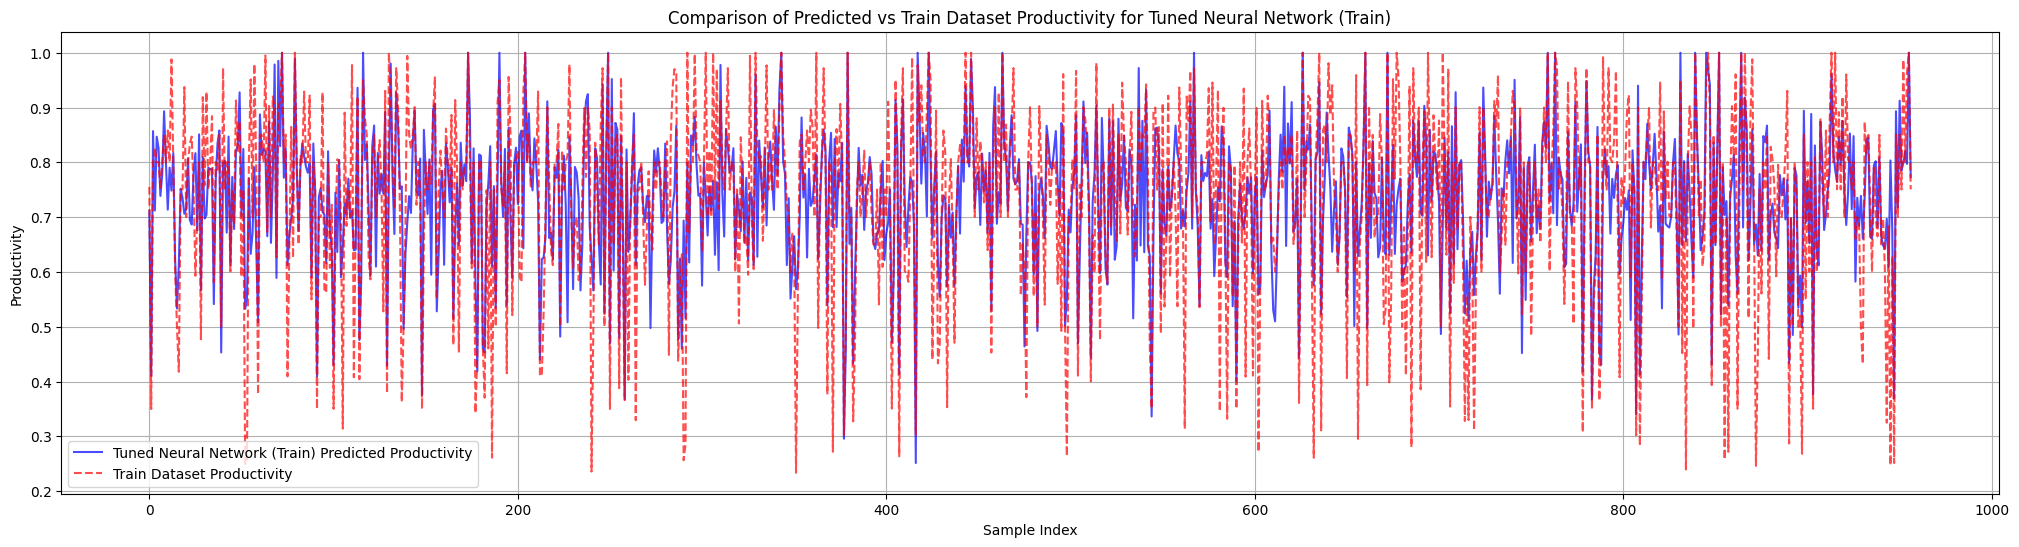

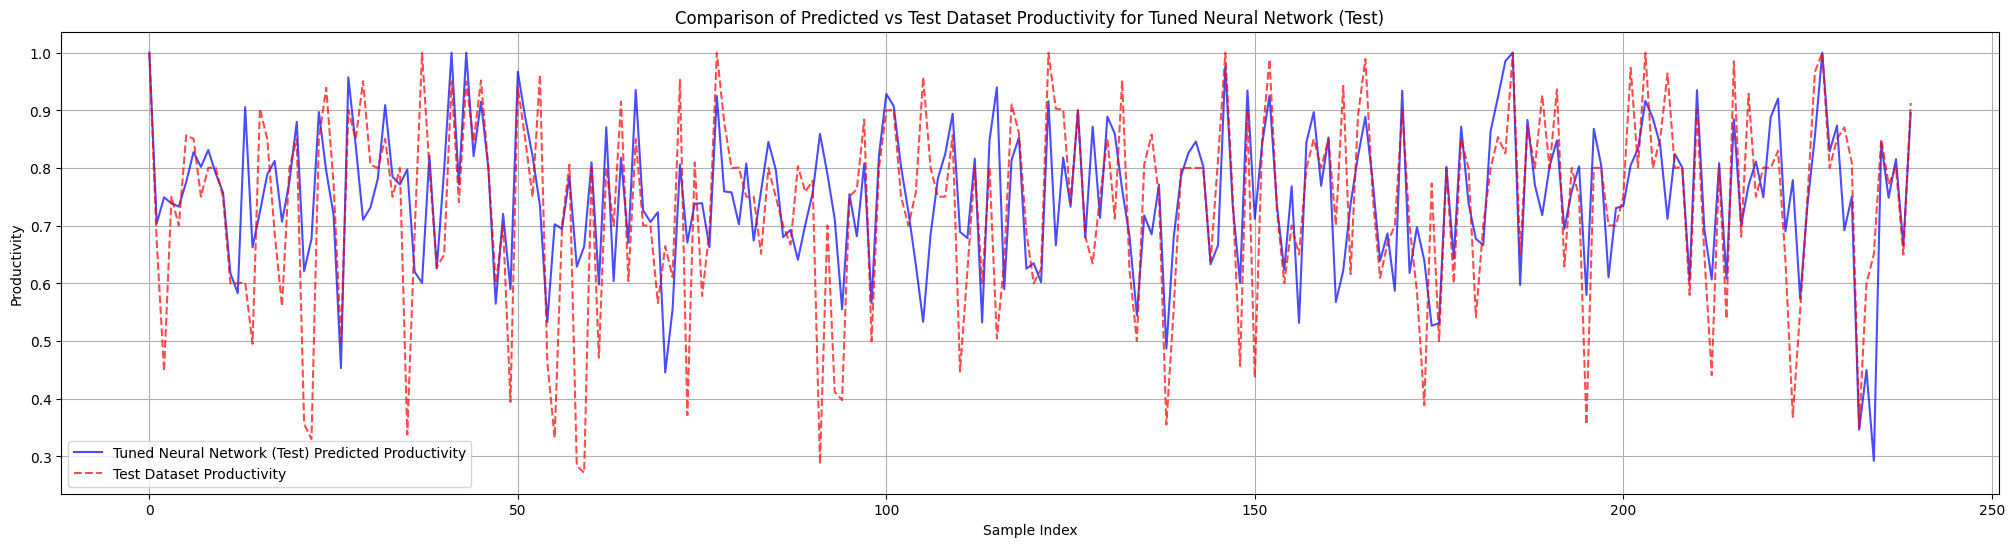

In [329]:
plotProductivityError(y_train, nn_y_train_pred, 'Tuned Neural Network (Train)', False)
plotProductivityError(y_test, nn_y_test_pred, 'Tuned Neural Network (Test)', True)

Shown above are the comparisons of the predicted and actual productivity values of the Tuned Neural Network to the train and test set.

In general, the Tuned Model's predictions show many of the same qualities of those of the Initial Model.
Mainly that is still conservative with its predicted productivity values, in contrast to the large variance of the actual productivity values in the dataset.
However, a somewhat key difference is that the model performed worse in the test set compared to the Initial Model, as mentioned in the error metrics.
In exchange, the Tuned Model now better follows the general trend of the data, with its predictions being able to follow the actual values in most cases, in exception to the large variance data points. 

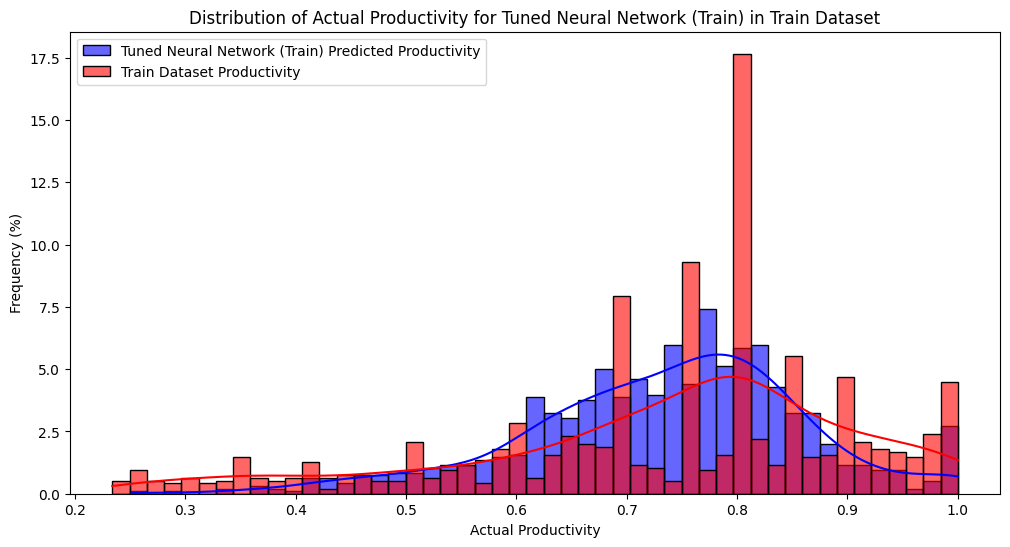

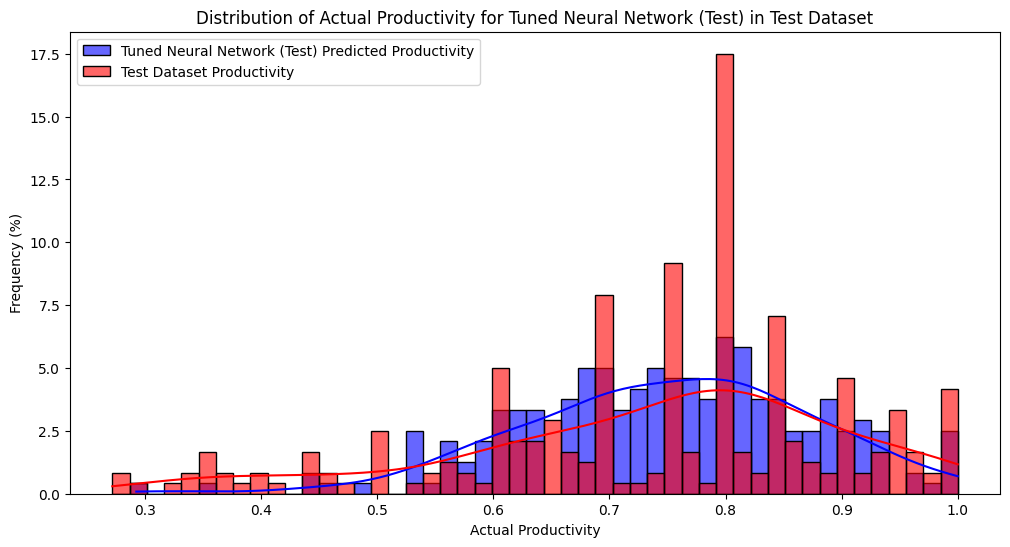

In [330]:
plotProductivityDistribution(y_train, nn_y_train_pred, 'Tuned Neural Network (Train)', False)
plotProductivityDistribution(y_test, nn_y_test_pred, 'Tuned Neural Network (Test)', True)

Shown above are the histograms of the predicted and actual productivity values of the Tuned Neural Network to the train and test set.

Similar to the analysis above, the Tuned Model's predictions show many of the same qualities of those of the Initial Model.
The key difference of the Tuned Model to the Initial Model's historgram is that the Tuned Model's predictions are more spread out in comparison.
This highlights how it prefers to make conservative predictions based on certain trends in the data and distribute its values.
However, this approach may not be the most effective as the distribution of the actual productivity of the dataset tends to skew to certain values, as shown in the histogram.

# X. Insights and Conclusions

# XI. References

## Neural Networks
1. 1.17. Neural network models (supervised). (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-networks-supervised
   - Multi-layer Perceptron (MLP) Models of scikit-learn

2. MLPRegressor. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor
   - Multi-layer Perceptron (MLP) Regressor of scikit-learn

3. Karpathy, A. (2019, April 25). A recipe for training neural networks. Andrej Karpathy blog. https://karpathy.github.io/2019/04/25/recipe/
   - General tips to train Neural Networks

4. Dutta, S. (2024, November 24). Number of neurons per hidden layer in neural networks: a guide. Medium. https://medium.com/@sanjay_dutta/number-of-neurons-per-hidden-layer-in-neural-networks-a-guide-106fea04fbfe
   - Tips for number of neurons and hidden layers for Neural Networks

5. An, S. (2022, June 2). How to tune hyperparameters for better neural network performance. Medium. https://medium.com/codex/how-to-tune-hyperparameters-for-better-neural-network-performance-b8f542855d2e
   - Tips for hyperparameter tuning of Neural Networks

6. GeeksforGeeks. (2023, December 7). Hyperparameter tuning. GeeksforGeeks. https://www.geeksforgeeks.org/hyperparameter-tuning/
   - Tips for hyperparameter tuning in general

7. Functions of Finishing Department in Garment Industry. (2015, October 24). Online Clothing Study. https://www.onlineclothingstudy.com/2015/10/functions-of-finishing-department-in.html
   - Some info on what the finishing department does

8. Breiman, L. (2001). Random Forests. Machine Learning, 45(1), 5–32. https://doi.org/10.1023/A:1010933404324
   - Original Random Forest paper, also explains the convergence and prevention of overfitting

9. Probst, P., Wright, M. N., & Boulesteix, A.-L. (2019). Hyperparameters and tuning strategies for random forest. WIREs Data Mining and Knowledge Discovery, 9(3), e1301. https://doi.org/10.1002/widm.1301
   - RF Tuning strategies 1

10. Scornet, E. (2017). Tuning parameters in random forests. ESAIM: Proceedings and Surveys, 60, 144–162. https://doi.org/10.1051/proc/201760144
   - RF Tuning strategies 2

11. What Is Random Forest? | IBM. (2021, October 20). https://www.ibm.com/topics/random-forest
   - Surface Level Understanding of RF